In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os
import sys
import random
from fastai2.basics import *
from fastai2.vision.all import *
from fastai2.callback.all import *



In [2]:
url_list = ['http://www.gartendatenbank.de/kategorie/einheimische+wildblumen', 
            'http://www.gartendatenbank.de/de/search.htm?q=einheimische%20wildblumen%20%20&start=250', 
            'http://www.gartendatenbank.de/de/search.htm?q=einheimische%20wildblumen%20%20%20&start=500']

#URL = 'http://www.gartendatenbank.de/de/search.htm?q=einheimische%20wildblumen%20%20&start=250'
#page = requests.get(URL)

In [3]:
os.getcwd()

'/storage'

In [4]:
def get_names (url_list):
    plant_names =[]
    for x in url_list:
        
        page = requests.get(x)
        soup = BeautifulSoup(page.content, 'html.parser')
        
        
        tmp = []
        results = soup.findAll('img')

        for img in results:
            tmp.append(img['alt'].split(' Einheimische')[0])
        # get rid of google ad links 
        tmp = tmp[3:]
        # remove empty entries
        tmp = [x for x in tmp if x]
        # remove additional info @ some entries
        tmp = [x.split(' 1 Infos')[0] for x in tmp if x]
        
        plant_names.extend(tmp)
        
    return plant_names

In [5]:
plant_names = get_names(url_list)

In [6]:
plant_names[1]

'Achillea ptarmica'

In [7]:
plant_names


['Achillea millefolium',
 'Achillea ptarmica',
 'Acinos alpinus',
 'Aconitum anthora',
 'Aconitum lycoctonum',
 'Aconitum napellus',
 'Adonis annua',
 'Adonis vernalis',
 'Agrimonia eupatoria',
 'Agrimonia procera',
 'Agrostemma githago',
 'Ajuga chamaepitys',
 'Ajuga reptans',
 'Alliaria petiolata',
 'Allium atropurpureum',
 'Allium schoenoprasum',
 'Allium senescens',
 'Allium ursinum',
 'Allium victorialis',
 'Alyssum montanum',
 'Ammi visnaga',
 'Anacamptis palustris',
 'Anacamptis pyramidalis',
 'Anagallis arvensis',
 'Anchusa arvensis',
 'Anchusa officinalis',
 'Anemone apennina',
 'Anemone nemorosa',
 'Anemone ranunculoides',
 'Anemone sylvestris',
 'Anemone trifolia',
 'Anemone x lipsiensis',
 'Anethum graveolens',
 'Angelica archangelica',
 'Antennaria dioica',
 'Anthericum liliago',
 'Anthericum ramosum',
 'Anthriscus sylvestris',
 'Antirrhinum majus',
 'Apocynum venetum',
 'Aposeris foetida',
 'Aquilegia',
 'Aquilegia alpina',
 'Aquilegia atrata',
 'Aquilegia einseleana',
 '

Since 560 wildflowers accumulate to quite a lot of data which will be to much for my free storage on paperspace or googledrive, I will randomly chose 20 different plants to build the classifier upon.

In [8]:
random.seed(22)
plant20 = random.sample(plant_names, 20); plant20

['Crocus biflorus',
 'Gymnadenia conopsea',
 'Anchusa arvensis',
 'Salvia glutinosa',
 'Erica tetralix',
 'Cirsium canum',
 'Narcissus poeticus',
 'Calendula officinalis',
 'Geranium phaeum',
 'Jacobaea vulgaris',
 'Aristolochia clematitis',
 'Melampyrum sylvaticum',
 'Epimedium',
 'Ranunculus alpestris',
 'Arabis procurrens',
 'Anacamptis palustris',
 'Inula germanica',
 'Malva moschata',
 'Pulsatilla alpina alba',
 'Erodium cicutarium']

Create the required dictionary for the duckgoose library.

In [9]:
zip_plant20 = zip(plant20, plant20)
dict_plant20= dict(zip_plant20)

In [19]:
from duckgoose import fetchImagesAndPrepForClassification

# dictionary structure `class_name => search term`
image_classes = dict_plant20
download_path = 'storage/wildflower'
output_path = 'storage/data/wildflower/'
number_of_images = 900

fetchImagesAndPrepForClassification(image_classes, download_path, output_path, number_of_images)


Item no.: 1 --> Item name = Chamerion angustifolium
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> Chamerion angustifolium 1.maitohorsma_%28epilobium_angustifolium%29.jpg
Completed Image ====> Chamerion angustifolium 2.3882471146_f3c5bdf6f2_z.jpg
Completed Image ====> Chamerion angustifolium 3.chamerion_angustifolium_6373.jpg
Completed Image ====> Chamerion angustifolium 4.chamerion-angustifolium-picture_csp51061474.jpg
Completed Image ====> Chamerion angustifolium 5.epilobium_angustifolium%2c_chamerion_angustifolium_maitohorsma_img_0875_c.jpg
Completed Image ====> Chamerion angustifolium 6.chamerion-angustifolium-ha-jbuermeyer.jpg
Completed Image ====> Chamerion angustifolium 7.89495254-save-download-preview-flower-plant-chamaenerion-angustifolium-chamerion-angustifolium-fireweed-great.jpg
Completed Image ====> Chamerion angustifolium 8.fireweed-epilobium-angustifolium-chamerion-angustifolium-f

Completed Image ====> Chamerion angustifolium 77.283856680.jpg
Completed Image ====> Chamerion angustifolium 78.schmalblaettriges-weidenroeschen-bilder-fireweed-images-epilobium-angustifolium-10325.jpg
Completed Image ====> Chamerion angustifolium 79.fireweed-166375_960_720.jpg
Completed Image ====> Chamerion angustifolium 80.chamerion_angustifolium_%28epilobium_angustifolium%29-_fireweed_-_yak%c4%b1otu_4.jpg
Completed Image ====> Chamerion angustifolium 81.chamerion-angustifolium-album-schmalbl%c3%a4ttriges-weidenr%c3%b6schen.jpg
Completed Image ====> Chamerion angustifolium 82.fireweed-epilobium-or-chamerion-stock-photograph_csp79776699.jpg
Completed Image ====> Chamerion angustifolium 83.chamerion-angustifolium-picture-id1030966896.jpg
Completed Image ====> Chamerion angustifolium 84.bwi-bs101334.jpg
Completed Image ====> Chamerion angustifolium 85.24416554138_f4e0a61249_b.jpg
Completed Image ====> Chamerion angustifolium 86.beautiful-pink-flowers-fireweed-close-up-among-green-grass

Completed Image ====> Chamerion angustifolium 162.fireweed-chamerion-angustifolium-wildflowers-oregon-62415-3714-2s-480x750.jpg
Invalid image format 'application/octet-stream'. Skipping...
Completed Image ====> Chamerion angustifolium 163.935417.jpg
Completed Image ====> Chamerion angustifolium 164.epilobium%20angustifolius%20var.%20album~july%20wide.jpg
Completed Image ====> Chamerion angustifolium 165.img_3807.jpg
Completed Image ====> Chamerion angustifolium 166.dp025.jpg
Completed Image ====> Chamerion angustifolium 167.chamerion%20angustifolium%20habitat%2021%20july%202010%20northwest%20territories%20victoria%20island%20jeffery%20m.%20saarela_5%28corrected%29%20.jpg
Completed Image ====> Chamerion angustifolium 168.b-epilobium-angustifolium6.jpg
Completed Image ====> Chamerion angustifolium 169.283856593.jpg
Completed Image ====> Chamerion angustifolium 170.schmalbl%c3%a4ttriges_weidenr%c3%b6schen_chamaenerion_angustifolium-500x375.jpg
Completed Image ====> Chamerion angustifolium

Completed Image ====> Chamerion angustifolium 249.fireweed.jpg
Completed Image ====> Chamerion angustifolium 250.wf-261a1.jpg
Completed Image ====> Chamerion angustifolium 251.chamerion-angustifolium-~-fireweed-b.jpg
Completed Image ====> Chamerion angustifolium 252.118433861-pink-flowers-of-fireweed-epilobium-or-chamerion-angustifolium-in-bloom-ivan-tea-.jpg
Completed Image ====> Chamerion angustifolium 253.0336503.jpg
Completed Image ====> Chamerion angustifolium 254.00039770.jpg
Completed Image ====> Chamerion angustifolium 255.fireweed-flowers-2.jpg
Completed Image ====> Chamerion angustifolium 256.6255_36.jpg
Completed Image ====> Chamerion angustifolium 257.shutterstock_171311651.jpg
Completed Image ====> Chamerion angustifolium 258.cam%20ang1%20ps.jpg
Completed Image ====> Chamerion angustifolium 259.06_fireweed1august_5.jpg
Invalid image format 'application/octet-stream'. Skipping...
Completed Image ====> Chamerion angustifolium 260.9708.jpg
Completed Image ====> Chamerion angu

Completed Image ====> Chamerion angustifolium 346.20180727_fireweed-chamerion-angustifolium-ssp-angustifolium-02_cr-kb.jpg
Completed Image ====> Chamerion angustifolium 347.ahgh116.jpg
Completed Image ====> Chamerion angustifolium 348.ugunspuku_teja__2_-dd16b7d8ef012a87a61f7d2bf88fcc0f.jpg
Completed Image ====> Chamerion angustifolium 349.chamerion%20angustifolium%20ssp%20circumvagum%202.jpg
Completed Image ====> Chamerion angustifolium 350.ep_angu3.jpg
Completed Image ====> Chamerion angustifolium 351.chamerion%20angustifolium-06-wilgeroosje2-i7.jpg
Completed Image ====> Chamerion angustifolium 352.chamerion_angustifolium_9513_600.jpg
Completed Image ====> Chamerion angustifolium 353.chamerion-angustifolium-album_mte0mzk3njva.jpg
Completed Image ====> Chamerion angustifolium 354.weidenroschen-epilobium-angustifolium-chamerion-angustifolium-an-der-unterseite-der-kravice-wasserfalle-in-bosnien-und-herzegowina-f4cwje.jpg
Completed Image ====> Chamerion angustifolium 355.32841.jpg
Complet

Completed Image ====> Anchusa officinalis 42.anchusa_officinalis_20060810_003.jpg
Completed Image ====> Anchusa officinalis 43.7567666918_609620b3e8_b.jpg
Completed Image ====> Anchusa officinalis 44.b-anchusa-officinalis-4.jpg
Completed Image ====> Anchusa officinalis 45.01604336.jpg
Completed Image ====> Anchusa officinalis 46.flowers-common-bugloss-anchusa-officinalis-600w-1164810418.jpg.webp
Invalid image format 'text/plain'. Skipping...
Completed Image ====> Anchusa officinalis 47.01604337.jpg
Completed Image ====> Anchusa officinalis 48.anchusa-officinalis-alkanet-aufrechte-blutentrieb-lager-schmale-blatter-und-spiralkabel-cluster-der-tubularen-violetten-bluten-pfkr5r.jpg
Completed Image ====> Anchusa officinalis 49.anchusa-officinalis-1_09052019.jpg
Completed Image ====> Anchusa officinalis 50.ochsenzunge_collage_neu.jpg
Completed Image ====> Anchusa officinalis 51.305_0.jpg
Completed Image ====> Anchusa officinalis 52.anchusa_officinalis_03.jpg
Completed Image ====> Anchusa off

Completed Image ====> Anchusa officinalis 133.common-bugloss-anchusa-officinalis-bob-gibbons.jpg
Completed Image ====> Anchusa officinalis 134.anchusa_officinalis_2.jpg
Completed Image ====> Anchusa officinalis 135.339583969.jpg
Completed Image ====> Anchusa officinalis 136.anchusa_officinalis_blueten_nah_2011052005.jpg
Completed Image ====> Anchusa officinalis 137.1-alkanet-anchusa-officinalis-bruno-petrigliascience-photo-library.jpg
Completed Image ====> Anchusa officinalis 138.013d2d066e225ce1f734dce1206f3758.jpg
Completed Image ====> Anchusa officinalis 139.c4f01b4bda88ec991693078acf6f13b2.jpg
Completed Image ====> Anchusa officinalis 140.anchusa%20officinalis2.jpg
Completed Image ====> Anchusa officinalis 141.selective-focus-of-anchusa-officinalis-known-as-the-common-bugloss-or-picture-id1006212278.jpg
Completed Image ====> Anchusa officinalis 142.kcp21nzmzd3d9ujwena8.jpg
Completed Image ====> Anchusa officinalis 143.anchusa-officinalis-anchusa.jpg
Completed Image ====> Anchusa of

Completed Image ====> Anchusa officinalis 226.maxresdefault.jpg
Completed Image ====> Anchusa officinalis 227.6214f8.jpg
Invalid image format 'application/octet-stream'. Skipping...
Completed Image ====> Anchusa officinalis 228.anchusa_officinalis_painted_l_hi.jpg
Completed Image ====> Anchusa officinalis 229.anchusa%20officinalis%201603.jpg
Completed Image ====> Anchusa officinalis 230.anchusa-officinalis-13-img_5565.jpg
Completed Image ====> Anchusa officinalis 231.d0e6841df43990b6a497c6b2aa6fdf9d.jpg
Completed Image ====> Anchusa officinalis 232.29636643075_9eaaff55d0_b.jpg
Completed Image ====> Anchusa officinalis 233.gewoehnliche-ochsenzunge-sdl-anchusa-officinalis-00001.jpg
Completed Image ====> Anchusa officinalis 234.b7860746-800px-wm.jpg
Completed Image ====> Anchusa officinalis 235.anchusa-officinalis-bloom-purple-flowers-plant-136370694.jpg
Completed Image ====> Anchusa officinalis 236.anchusa-officinalis-fr-gcarr1-b.jpg
Completed Image ====> Anchusa officinalis 237.rdc-ad-2

Completed Image ====> Anchusa officinalis 318.3904915951_a977986f59_b.jpg
Completed Image ====> Anchusa officinalis 319.b-anchusa-officinalis-7.jpg
Completed Image ====> Anchusa officinalis 320.258237.jpg
Completed Image ====> Anchusa officinalis 321.16303.jpg
Completed Image ====> Anchusa officinalis 322.df97e2.jpg
Completed Image ====> Anchusa officinalis 323.depositphotos_116386528-stock-photo-bumblebee-on-anchusa-officinalis-common.jpg
Completed Image ====> Anchusa officinalis 324.pict0749.jpg
Completed Image ====> Anchusa officinalis 325.239bf05fad06041fb49868afabe10e8e4f46c6cd.ochsenzunge-gewoehnliche-anchusa-officinalis-1_595.jpg
Completed Image ====> Anchusa officinalis 326.ochsenzunge2_m.jpg
Completed Image ====> Anchusa officinalis 327.23e2b10be78346b25e555b204e6f6265.jpg
Completed Image ====> Anchusa officinalis 328.32441.jpg
Completed Image ====> Anchusa officinalis 329.s-l300.jpg
Completed Image ====> Anchusa officinalis 330.18518.jpg
Completed Image ====> Anchusa officina

Completed Image ====> Lamium galeobdolon 29.b8221280-800px-wm.jpg
Completed Image ====> Lamium galeobdolon 30.lamium-galeobdolon-gelbe-taubnessel-23-1024x1024.jpg
Completed Image ====> Lamium galeobdolon 31.20120620231905-1edaa5c3.jpg
Completed Image ====> Lamium galeobdolon 32.s-l640.jpg
Completed Image ====> Lamium galeobdolon 33.lamium-galeobdolon-variegatum-syn-l-g-montanum-florentinum-a24rn2.jpg
Completed Image ====> Lamium galeobdolon 34.13566724-lamium-galeobdolon.jpg
Completed Image ====> Lamium galeobdolon 35.lamium_galeobdolon_%27variegatum%27_%28l.%29_l._%28am_ak278554-1%29.jpg
Completed Image ====> Lamium galeobdolon 36.gewoehnliche-goldnessel-pflanze-2025-696x464.jpg
Completed Image ====> Lamium galeobdolon 37.l_galeobdolon-flowering.jpg
Completed Image ====> Lamium galeobdolon 38.gelbe-erzengel-lamium-galeobdolon-hermann-stolz-syn-lamiastrum-galeobdolon-herrmanns-pride-ct8mxp.jpg
Completed Image ====> Lamium galeobdolon 39.lamium_galeobdolon_overzicht.jpg
Completed Image 

Completed Image ====> Lamium galeobdolon 123.gwg-stf3396.jpg
Completed Image ====> Lamium galeobdolon 124.bild-foto-gelbe-taubnessel-lamium-galeobdolon-hermann-s-533488.jpg
Completed Image ====> Lamium galeobdolon 125.thumbnail.php.jpg
Completed Image ====> Lamium galeobdolon 126.silber-goldnessel-silberblttrige-taubnessel-silber-taubnessel-lamium-argentatum-galeobdolon-argentatum-lamium-galeobdolon-subsp-argentatum-var-2bk1aep.jpg
Completed Image ====> Lamium galeobdolon 127.lamiumgaleobdolon150613.jpg
Completed Image ====> Lamium galeobdolon 128.1745_foto_b2_wikipedia_user_ghislain118_lamium_galeobdolon.jpg
Completed Image ====> Lamium galeobdolon 129.goldnessel.jpg
Completed Image ====> Lamium galeobdolon 130.37950770.075a18d8.1024.jpg
Invalid image format 'application/octet-stream'. Skipping...
Completed Image ====> Lamium galeobdolon 131.d461ef6d2878b02f38fe325d22789679.jpg
Completed Image ====> Lamium galeobdolon 132.large_lamium_galeobdolon%20(2%20von%203).jpg
URLError on an ima

Completed Image ====> Lamium galeobdolon 211.33225112784_70d9fc1a70_b.jpg
Completed Image ====> Lamium galeobdolon 212.lamium-galeobdolon-argentatum-5.jpg
Completed Image ====> Lamium galeobdolon 213.img_4330_1.jpg
Completed Image ====> Lamium galeobdolon 214.lamium-galeobdolon.jpeg
Completed Image ====> Lamium galeobdolon 215.1479811620_3522.jpg
Completed Image ====> Lamium galeobdolon 216.lamium_galeobdolon_02.jpg
Completed Image ====> Lamium galeobdolon 217.01627297.jpg
Completed Image ====> Lamium galeobdolon 218.goldnessel12.jpg
Completed Image ====> Lamium galeobdolon 219.59284104-dried-yellow-archangel-lamium-galeobdolon-alternative-medicinal-herb-for-herbal-tea.jpg
Completed Image ====> Lamium galeobdolon 220.lamium_galeobdolon_5.jpg
Completed Image ====> Lamium galeobdolon 221.lamium-galeobdolon-pictures_csp9364718.jpg
Completed Image ====> Lamium galeobdolon 222.stock-photo-lamium-galeobdolon--yellow-archangel-103818-12644.jpg
Completed Image ====> Lamium galeobdolon 223.lami

Completed Image ====> Lamium galeobdolon 306.25389a.jpg
Completed Image ====> Lamium galeobdolon 307.lamium-galeobdolon.jpeg
Completed Image ====> Lamium galeobdolon 308.deta-1239.jpg
Completed Image ====> Lamium galeobdolon 309.5376646_039c8b1a.jpg
Completed Image ====> Lamium galeobdolon 310.img_7712.jpg
Completed Image ====> Lamium galeobdolon 311.lamium-galeobdolon-commonly-known-yellow-600w-437779546.jpg
Completed Image ====> Lamium galeobdolon 312.erzengel-goldene-taubnessel-wiesel-die-schnauze-lamium-galeobdolon-galeobdolon-luteum-blute-gelb-osterreich-e0w1w2.jpg
Completed Image ====> Lamium galeobdolon 313.cfgcd93.jpg
Completed Image ====> Lamium galeobdolon 314.lamiastrumhp040516.jpg
Completed Image ====> Lamium galeobdolon 315.goldnessel8_s.jpg
Completed Image ====> Lamium galeobdolon 316.bild-foto-gelbe-taubnessel-lamium-galeobdolon-lamiastrum-466015.jpg
Completed Image ====> Lamium galeobdolon 317.lamium-galeobdolon-2.jpg
URLError on an image...trying next one... Error: HTT

Completed Image ====> Gypsophila repens 9.655c.jpg
Completed Image ====> Gypsophila repens 10.schleierkraut-gypsophila-repens-rosea-1-23950.jpg
Completed Image ====> Gypsophila repens 11.gm_l.jpg
Completed Image ====> Gypsophila repens 12.gypsophila-repens-rosea-creeping-baby-s-breath.jpg
Completed Image ====> Gypsophila repens 13.81jckbpixcl._ac_sl1000_.jpg
Completed Image ====> Gypsophila repens 14.il_570xn.1143424805_sjt9.jpg
Completed Image ====> Gypsophila repens 15.gypsophila-repens-rosa-schoenheit-600x800-proportionalexact.jpg
Completed Image ====> Gypsophila repens 16.62440666-gypsophila-repens-oder-den-atem-des-babys-kleinen-rosa-bl%c3%bcten.jpg
Invalid image format 'text/html'. Skipping...
Completed Image ====> Gypsophila repens 17.gypsophila_repens_rosea.jpg
Completed Image ====> Gypsophila repens 18.57080693-wei%c3%9fen-bl%c3%bcten-gypsophila-repens-auf-einem-busch-im-fr%c3%bchling.jpg
Completed Image ====> Gypsophila repens 19.00-64106-schleierkraut-pink-star-gypsophila-re

Completed Image ====> Gypsophila repens 101.knuddel_600x600.jpg
Completed Image ====> Gypsophila repens 102.thumbnail.jpg
Completed Image ====> Gypsophila repens 103.gypsophila-repens-filou-white.jpg
Completed Image ====> Gypsophila repens 104.610.jpg
Completed Image ====> Gypsophila repens 105.61xe4bdewal._ac_sx450_.jpg
Completed Image ====> Gypsophila repens 106.depositphotos_20822189-stock-photo-white-flowers-of-gypsophila-repens.jpg
Completed Image ====> Gypsophila repens 107.bwi-bs349288.jpg
Completed Image ====> Gypsophila repens 108.gypsophila-rosenschleier_600x600.jpg
Completed Image ====> Gypsophila repens 109.gypsophila-repens-filou-rose.jpg
Completed Image ====> Gypsophila repens 110.gypsophila_repens_l._%287477383754%29.jpg
Completed Image ====> Gypsophila repens 111.gypsophila_repens_rosea.jpg
Completed Image ====> Gypsophila repens 112.142560094-beautiful-flowering-close-up-of-alpine-gypsophila-flower-or-creeping-babys-breath-gypsophila-repens-.jpg
URLError on an image...

Completed Image ====> Gypsophila repens 191.repens-filou-alba_530x@2x.jpg
Completed Image ====> Gypsophila repens 192.30039_product.jpg
Completed Image ====> Gypsophila repens 193.thumb_180_plant_18599_shoot_20150111172702.jpg
Completed Image ====> Gypsophila repens 194.gypsophila%20repens%20rosea%20pink%20creeping%20baby's%20breath_201568%20-%20dw.jpg
Completed Image ====> Gypsophila repens 195.f239-21.jpg
Completed Image ====> Gypsophila repens 196.stock-photo-baby-s-breath-pink-creeping-gypsophila-repens-rosea-baby-s-breath-pretty-pink-flowers-1238029306.jpg
Completed Image ====> Gypsophila repens 197.32071168828_9d140f3ee9_z.jpg
Completed Image ====> Gypsophila repens 198.gypsophila%20repens%20dubia.jpg
Completed Image ====> Gypsophila repens 199.ga352q.jpg
Completed Image ====> Gypsophila repens 200.w_1_0009035_plazeca-sadrenka-filou-white.jpeg
Completed Image ====> Gypsophila repens 201.171189a_l.jpg
Completed Image ====> Gypsophila repens 202.gypsophila-repens-filou-rose.jpeg
Co

Completed Image ====> Gypsophila repens 289.240_f_180326550_amezne1w7wl1hwb4ea25stdx4sf6juhj.jpg
Completed Image ====> Gypsophila repens 290.dsc01612.jpg
Completed Image ====> Gypsophila repens 291.bloemzaden_gypsophila_gipskruid_s1723.jpg
Completed Image ====> Gypsophila repens 292.45030051785_63093a774a_z.jpg
Completed Image ====> Gypsophila repens 293.240_f_180326550_amezne1w7wl1hwb4ea25stdx4sf6juhj.jpg
Completed Image ====> Gypsophila repens 294.2274191_3_720x600.jpg
Completed Image ====> Gypsophila repens 295.gm_l.jpg
Completed Image ====> Gypsophila repens 296.dsc01612.jpg
Completed Image ====> Gypsophila repens 297.bloemzaden_gypsophila_gipskruid_s1723.jpg
Completed Image ====> Gypsophila repens 298.w.jpg
Completed Image ====> Gypsophila repens 299.image-photo-alpine-gypsophila-gypsophila-repens-497344.jpg
Completed Image ====> Gypsophila repens 300.gypsophila%20repens%20rosea%20large.jpg
Completed Image ====> Gypsophila repens 301.gypsophila-repens-3.jpg
Completed Image ====> G

Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> Gentiana cruciata 1.gentianaceae_-_gentiana_cruciata-4.jpg
Completed Image ====> Gentiana cruciata 2.240px-gentianaceae_-_gentiana_cruciata-3.jpg
Completed Image ====> Gentiana cruciata 3.gentiana_cruciata_kz04.jpg
Completed Image ====> Gentiana cruciata 4.61uc6epvr6l._ac_sx450_.jpg
Completed Image ====> Gentiana cruciata 5.ab06401541599c691dcb0532971f763d.jpg
Completed Image ====> Gentiana cruciata 6.fb0182b58d6ee7c4530a7f75d8857823.jpg
Completed Image ====> Gentiana cruciata 7.1-87.jpg
Completed Image ====> Gentiana cruciata 8.20171107123152-666da466.jpg
Completed Image ====> Gentiana cruciata 9.gentiana_cruciata_002.jpg
Completed Image ====> Gentiana cruciata 10.gentiana-cruciata-blue-cross-0000-high-res.jpg
Completed Image ====> Gentiana cruciata 11.gentiana_true_blue__31009.1379510683.380.500.jpg
Completed Image ====> Gentiana cruciata 12.2-105.jpg
Completed 

Completed Image ====> Gentiana cruciata 104.kreuz-enzian-gentiana-cruciata-1601c7ef-cead-4a33-8dc6-ba14727fbc45.jpg
Completed Image ====> Gentiana cruciata 105.gentiana-cruciata-6454-7-2014.jpg
Completed Image ====> Gentiana cruciata 106.7dee0c6eb82ddd537165fe5c3c317dbe.jpg
Completed Image ====> Gentiana cruciata 107.gentian-gentiana-cruciata-stock-photos_csp6553513.jpg
Completed Image ====> Gentiana cruciata 108.wildfind_kreuzenzian_1-kreuzenzian-gentiana-cruciata-ap.jpg
Completed Image ====> Gentiana cruciata 109.26049-gentiana-cruciata-krym-a-2425-jl.jpg.png
Completed Image ====> Gentiana cruciata 110.42036441030_bf40b0006e_b.jpg
Completed Image ====> Gentiana cruciata 111.kreuz%7cenzian-gentiana_cruciata-98765.jpg
Completed Image ====> Gentiana cruciata 112.gentiana-cruciata-star-gentian-or-cross-gentian-herbaceous-perennial-picture-id1069749494.jpg
URLError on an image...trying next one... Error: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to 

Completed Image ====> Gentiana cruciata 205.gentiana_cruciata_3134_2-1024x768.jpg
URLError on an image...trying next one... Error: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)>
Completed Image ====> Gentiana cruciata 206.gentiana-cruciata-latin-garden-decorative-flower-blue-spring-flowers-179125367.jpg
Completed Image ====> Gentiana cruciata 207.riesen-mohn-samen-100-stk-rot-ziermohn-winterhart.jpg
Completed Image ====> Gentiana cruciata 208.70015.jpg
Completed Image ====> Gentiana cruciata 209.gentiana_cruciata_5.jpg
Completed Image ====> Gentiana cruciata 210.gentianacruciata070701.jpg
URLError on an image...trying next one... Error: HTTP Error 403: Forbidden
Completed Image ====> Gentiana cruciata 211.gentiana-cruciata-blueten.jpg
Completed Image ====> Gentiana cruciata 212.ayhqfhhdfazrossk4bo5.jpg
Completed Image ====> Gentiana cruciata 213.ndsc_9858.jpg
Completed Image ====> Gentiana cruciata 214.66

Completed Image ====> Gentiana cruciata 299.htb1cq5rxc_vk1rjy0foq6xixvxa4.jpg
Completed Image ====> Gentiana cruciata 300.gentiana%20cruciata%20ssp.%20phlogifolia%20bg%20hamburg-5-m.jpg
Completed Image ====> Gentiana cruciata 301.500_f_211633464_scn95txdwnzxtldvvcp3acmpioflrvc9.jpg
Completed Image ====> Gentiana cruciata 302.balkan6.jpg
Completed Image ====> Gentiana cruciata 303.gentiana%20cruciata%20phlogifolia%20c.jpg
Completed Image ====> Gentiana cruciata 304.sp10786-730x413.jpg
URLError on an image...trying next one... Error: HTTP Error 404: Not Found
Completed Image ====> Gentiana cruciata 305.default.jpg
Completed Image ====> Gentiana cruciata 306.gentiana-cruciata-08.jpg
Completed Image ====> Gentiana cruciata 307.altai-mountains-gentian-flowers-picture-id1140430023.jpg
Completed Image ====> Gentiana cruciata 308.2004011303.jpg
Completed Image ====> Gentiana cruciata 309.800x800-gentiana-cruciata-l.jpg
Completed Image ====> Gentiana cruciata 310.gentiana%20cruciata%2012%2c%20k

Completed Image ====> Crepis capillaris 17.smooth-hawksbeard-crepis-capillaris-bluhende-pflanze-a4c0n7.jpg
Completed Image ====> Crepis capillaris 18.crepis%20capillaris%2013%2c%20klein%20streepzaad%2c%20saxifraga-peter%20meininger.jpg
Completed Image ====> Crepis capillaris 19.126990642-close-up-of-smooth-hawksbeard-crepis-capillaris-blooming-in-the-summer-season.jpg
Completed Image ====> Crepis capillaris 20.crepis_capillaris.jpg
Completed Image ====> Crepis capillaris 21.crepis-capillaris-2.jpg
Completed Image ====> Crepis capillaris 22.0012.jpeg
Completed Image ====> Crepis capillaris 23.crepis-capillaris-or-smooth-hawksbeard-jkg5w7.jpg
Completed Image ====> Crepis capillaris 24.2008071001.jpg
Completed Image ====> Crepis capillaris 25.crepis-capillaris-fl-gmittelhauser-a.jpg
Completed Image ====> Crepis capillaris 26.crepis_capillaris_sl5.jpg
Completed Image ====> Crepis capillaris 27.crepis%20capillaris%2001.jpg
Completed Image ====> Crepis capillaris 28.126990740-close-up-of-smo

Completed Image ====> Crepis capillaris 111.crepis-capillaris-ha-glienau-a.jpg
Completed Image ====> Crepis capillaris 112.a-hoverfly-on-the-flower-of-a-smooth-hawksbeard-crepis-capillaris-p6pj4p.jpg
Completed Image ====> Crepis capillaris 113.crepis-capillaris-5.jpg
Completed Image ====> Crepis capillaris 114.crepis_capillaris_a_003.jpg
Completed Image ====> Crepis capillaris 115.crepiscapillaris1f.jpg
Completed Image ====> Crepis capillaris 116.crepis_capillaris_p1070939_20160626_04.jpg
Completed Image ====> Crepis capillaris 117.kleinkoepfiger-pippau-crepis-capillaris-32d3eeb9-c1ac-494a-894e-899892bd36e1.jpg
Completed Image ====> Crepis capillaris 118.0006024.jpg
Completed Image ====> Crepis capillaris 119.cfgcn47.jpg
Completed Image ====> Crepis capillaris 120.14210320367_23a1029d7e_b.jpg
Completed Image ====> Crepis capillaris 121.crepis%20capillaris02.jpg
Completed Image ====> Crepis capillaris 122.800px-crepis_capillaris_rosetteandstem.jpg
Completed Image ====> Crepis capillaris

Completed Image ====> Crepis capillaris 212.687851.jpg
Completed Image ====> Crepis capillaris 213.crepis%20capillaris%2020%2c%20klein%20streepzaad%2c%20saxifraga-ed%20stikvoort.jpg
Completed Image ====> Crepis capillaris 214.crepis_capillaris_2125.jpg
Completed Image ====> Crepis capillaris 215.kleinkopfpippau_22.jpg
Completed Image ====> Crepis capillaris 216.crepis%20capillaris-klein%20streepzaad-07.jpg
Completed Image ====> Crepis capillaris 217.5390077_a3fe0cc6.jpg
Completed Image ====> Crepis capillaris 218.crepis%20capillaris-filoli%20garden%20redwood%20city-ca-img_9059.jpg
Completed Image ====> Crepis capillaris 219.crepis-capillaris-seeds.jpg
Completed Image ====> Crepis capillaris 220.default.jpg
Completed Image ====> Crepis capillaris 221.500_f_275812838_b7rmctuqpj2jnbk9pajwjxxc0smldv05.jpg
Completed Image ====> Crepis capillaris 222.crepis-capillaris-1.jpg
Completed Image ====> Crepis capillaris 223.240.jpg
Completed Image ====> Crepis capillaris 224.crepis-capillaris-1.jpg

Completed Image ====> Crepis capillaris 322.crepis-capillarisred.jpg
Completed Image ====> Crepis capillaris 323.eed20382853ab41fc78677cb2b903487.jpg
Completed Image ====> Crepis capillaris 324.crepis%20capillaris%2019%2c%20klein%20streepzaad%2c%20saxifraga-ed%20stikvoort.jpg
Completed Image ====> Crepis capillaris 325.cpmjpgs.php.jpg
Completed Image ====> Crepis capillaris 326.crepis%20capillaris-foz-14846%20(2).jpg
Completed Image ====> Crepis capillaris 327.crepis-capillaris7.jpg
Completed Image ====> Crepis capillaris 328.crepis_capillaris_06.jpg
Completed Image ====> Crepis capillaris 329.18509245085_f45397f662_b.jpg
Completed Image ====> Crepis capillaris 330.crepis-capillaris-b.jpg
Completed Image ====> Crepis capillaris 331.klein-streepzaad11.jpg
Completed Image ====> Crepis capillaris 332.43926.jpg
Completed Image ====> Crepis capillaris 333.vc77+00181.jpg
Completed Image ====> Crepis capillaris 334.crepis%2bcapillaris%252c%2bpresatxu%252c%2borozko2%2bcopiar.jpg
Completed Imag

Completed Image ====> Carlina vulgaris 33.carlina_vulgaris,i_mws132666.jpg
Completed Image ====> Carlina vulgaris 34.carline_thistle_%28carlina_vulgaris%29_-_geograph.org.uk_-_215979.jpg
Completed Image ====> Carlina vulgaris 35.carlina-vulgaris.jpg
Completed Image ====> Carlina vulgaris 36.bfl-000977_20140522_102130.jpg
Completed Image ====> Carlina vulgaris 37.carlina-vulgaris-blw042063.jpg
Completed Image ====> Carlina vulgaris 38.2975893358_a6fdc3cbfc_b.jpg
Completed Image ====> Carlina vulgaris 39.carlina_vulgaris1_1.jpg
Completed Image ====> Carlina vulgaris 40.carlina-vulgaris-carline-thistle-roots-leaves-and-flower-heads-pfp9eh.jpg
Completed Image ====> Carlina vulgaris 41.carline-thistle-carlina-vulgaris-annie-haycock.jpg
Completed Image ====> Carlina vulgaris 42.carlina-vulgaris-golddistel-geschlossene-bl%c3%bcte-aufsicht.jpg
Completed Image ====> Carlina vulgaris 43.carlina_vulgaris_carline_thistle_flower_13-08-04.jpg
Completed Image ====> Carlina vulgaris 44.46736738402_617

Completed Image ====> Carlina vulgaris 125.v2.jpg
Completed Image ====> Carlina vulgaris 126.carline-thistle-carlina-vulgaris-blooming-germany-x47ygc.jpg
Completed Image ====> Carlina vulgaris 127.carlina-vulgaris-carline-thistle-family-asteraceae-compositae-biebersteinii-plant-field-nature-corymbosa-154298937.jpg
Completed Image ====> Carlina vulgaris 128.carlina_vulgaris_carline_thistle_close.jpg
Completed Image ====> Carlina vulgaris 129.zon-4692597.jpg
Completed Image ====> Carlina vulgaris 130.o_19tfutcb41t3g19gk86518v41lcd4h.jpg
Completed Image ====> Carlina vulgaris 131.4153254923_51d107885d.jpg
Completed Image ====> Carlina vulgaris 132.stock-photo-carlina-vulgaris--carline-thistle-102890-11644.jpg
Completed Image ====> Carlina vulgaris 133.01469793.jpg
Completed Image ====> Carlina vulgaris 134.b-carlina-vulgaris-5.jpg
Completed Image ====> Carlina vulgaris 135.20120621000507-cb46a883.jpg
Completed Image ====> Carlina vulgaris 136.image-photo-common-carline-thistle-carlina-vul

Completed Image ====> Carlina vulgaris 223.132005351.ijnszxdi.sptistellngbladig8642.jpg
Completed Image ====> Carlina vulgaris 224.carlina_vulgaris_by_megadantron_dblpx7y-250t.jpg
Completed Image ====> Carlina vulgaris 225.90180624.jpg
Completed Image ====> Carlina vulgaris 226.p15qgko6mt17lon5318djqps6a2g.jpg
Completed Image ====> Carlina vulgaris 227.carline-thistle-carlina-vulgaris-leaf-rosette-germany-x0anpx.jpg
Completed Image ====> Carlina vulgaris 228.gwg-drb47.jpg
Completed Image ====> Carlina vulgaris 229.carlina-vulgaris-gewoehnliche-golddistel.jpg
Completed Image ====> Carlina vulgaris 230.depositphotos_184441776-stock-photo-zygaena-filipendulae-six-spot-burnet.jpg
Completed Image ====> Carlina vulgaris 231.csm_2013-07_golddistel_carlina-vulgaris_jme11137_jm_c028c1b8f6.jpg
Completed Image ====> Carlina vulgaris 232.carlina-biebersteinii-plant-field-nature-carlina-vulgaris-carline-thistle-family-asteraceae-compositae-carlina-corymbosa-154298984.jpg
Completed Image ====> Carli

Completed Image ====> Carlina vulgaris 320.carlina-de-monte-carlina-vulgaris-ya-seca-22054-xl.jpg
Completed Image ====> Carlina vulgaris 321.carlina_vulgaris9.jpg
Completed Image ====> Carlina vulgaris 322.carlina-vulgaris-004.jpg
Completed Image ====> Carlina vulgaris 323.carlina%20vulgaris%203%2c%20driedistel%2c%20saxifraga-jan%20van%20der%20straaten.jpg
Completed Image ====> Carlina vulgaris 324.carlina_vulgaris2.jpg
Completed Image ====> Carlina vulgaris 325.130714tgnr-carline-thistle-with-thick-thighed-beetle-bryn-euryn-e1407072413384.jpg
Completed Image ====> Carlina vulgaris 326.carlina_vulgaris_2.jpg
Completed Image ====> Carlina vulgaris 327.carlina-vulgaris-carline-thistle-2745xpng,medium.2x.1502526560.jpg
Completed Image ====> Carlina vulgaris 328.bwi-bs409596.jpg
Completed Image ====> Carlina vulgaris 329.url.json.jpg
Completed Image ====> Carlina vulgaris 330.4086449116_78ce78b506_b.jpg
Completed Image ====> Carlina vulgaris 331.carlina-vulgaris-4.jpg
Completed Image ====>

Completed Image ====> Campanula latifolia 23.campanula-latifolia-alba_600x600.jpg
Completed Image ====> Campanula latifolia 24.campanula-latifolia-wald-glockenblume-samen-01.jpg
Completed Image ====> Campanula latifolia 25.campanula-latifolia-riesige-glockenblume-f2xfmf.jpg
Completed Image ====> Campanula latifolia 26.1400653605-18453-340.jpg
Completed Image ====> Campanula latifolia 27.campanula%20latifolia%205%2c%20breed%20klokje%2c%20saxifraga-ed%20stikvoort.jpg
Completed Image ====> Campanula latifolia 28.campanula_latifolia_witte_wieven.jpg
Completed Image ====> Campanula latifolia 29.mr_120219_campanula_lat_mac_alba.jpg
Completed Image ====> Campanula latifolia 30.campanula-latifolia-var-macrantha-alba.jpg
Completed Image ====> Campanula latifolia 31.campanula-latifolia-var-1200x630-proportionalbiggest.jpg
Completed Image ====> Campanula latifolia 32.679.jpg
Completed Image ====> Campanula latifolia 33.campanula_lat._var._macrantha_alba.jpg
Completed Image ====> Campanula latifol

Completed Image ====> Campanula latifolia 111.campanula_latifolia_wald-glockenblume_schlosspark%20gross%20potrems.jpg
Completed Image ====> Campanula latifolia 112.campanula_latifolia_2.jpg
Completed Image ====> Campanula latifolia 113.campanula-latifolia-brantwood.jpg
Completed Image ====> Campanula latifolia 114.440px-campanula_latifolia.jpg
Completed Image ====> Campanula latifolia 115.23072014213853_2567_art_1564_dsc_6110.jpg
Completed Image ====> Campanula latifolia 116.campanula-latifolia--x-.jpg
Completed Image ====> Campanula latifolia 117.campanula_latifolia_ho09.jpg
Completed Image ====> Campanula latifolia 118.campanula-latifolia-purple-flowers-on-spike-picture-id130792237.jpg
Completed Image ====> Campanula latifolia 119.29147413148_b838a181fc_b.jpg
Completed Image ====> Campanula latifolia 120.doldenglockenblume-white-pouffe---campanula-lactiflora.jpg
Completed Image ====> Campanula latifolia 121.campanulalatifoliaalba.jpg
Completed Image ====> Campanula latifolia 122.51-c

Completed Image ====> Campanula latifolia 203.campanulalatifolia2-vi.jpg
Completed Image ====> Campanula latifolia 204.pic_59821408wasserpflanze.jpg
Completed Image ====> Campanula latifolia 205.campanula_latifolia_07.jpg
Completed Image ====> Campanula latifolia 206.img_1467.jpg
Completed Image ====> Campanula latifolia 207.campanula-latifolia-var_mte0mzk2mdba.jpg
Completed Image ====> Campanula latifolia 208.campanula-latifolia-macrantha.jpg
Completed Image ====> Campanula latifolia 209.glockenblume-brantwood-bluete-tiefviolett_campanula-latifolia09-300x300.jpg
Completed Image ====> Campanula latifolia 210.campanula-latifolia-var.-macrantha.jpg
Completed Image ====> Campanula latifolia 211.riesige-glockenblumen-campanula-latifolia-auf-weissem-hintergrund-2c5wbkk.jpg
Completed Image ====> Campanula latifolia 212.12106979-campanula-latifolia-calamintha-grandiflora-stachys-ziest.jpg
Completed Image ====> Campanula latifolia 213.gm_l.jpg
Completed Image ====> Campanula latifolia 214.sta_

Completed Image ====> Campanula latifolia 295.1999campanula_latifolia_breitblaettrigeglockenblume_2.jpg
Completed Image ====> Campanula latifolia 296.campanula%20latifolia%20alba%20-%201.jpg
Completed Image ====> Campanula latifolia 297.campanula-latifolia-the-giant-stock-photography__k67339505.jpg
Completed Image ====> Campanula latifolia 298.campanula_latifolia_07_icon.jpg
Completed Image ====> Campanula latifolia 299.pm143568%20optimized.jpg
Completed Image ====> Campanula latifolia 300.coleosporium-campanulae_campanula-latifolia_jkruse-2b.jpg
Completed Image ====> Campanula latifolia 301.campanula_latifolia_flower2.jpg
Completed Image ====> Campanula latifolia 302.campanula_latifolia_und_var._macrantha_1.jpg
Completed Image ====> Campanula latifolia 303.328372831.jpg
Completed Image ====> Campanula latifolia 304.81ffv3byebl._ac_sx522_.jpg
Completed Image ====> Campanula latifolia 305.campanula-latifolia-garden-giant-bellflower-600w-1114472585.jpg
Completed Image ====> Campanula lat

Completed Image ====> Pulsatilla alpina apiifolia 6.pulsatillaalpinaapiifoliacopy.jpg
Completed Image ====> Pulsatilla alpina apiifolia 7.alpine-kuhschelle-gelbe-form-pulsatilla-alpina-ssp-apiifolia-schweizer-alpen-bp4y99.jpg
Completed Image ====> Pulsatilla alpina apiifolia 8.pulsatilla_alpina_subsp_apiifolia_01.jpg
Completed Image ====> Pulsatilla alpina apiifolia 9.pulsatilla-alpina-ssp-apiifolia-gelbe-kuchenschelle-pulsatilla-gialla-bm1d12.jpg
Completed Image ====> Pulsatilla alpina apiifolia 10.20120620233824-36bfe1fd.jpg
Completed Image ====> Pulsatilla alpina apiifolia 11.alpine-anemone-yellow-alpine-anemone-pulsatilla-alpina-ssp-apiifolia-pulsatilla-apiifolia-blooming-germany-xdg38e.jpg
Completed Image ====> Pulsatilla alpina apiifolia 12.9140133959_1cbd5bfa2e_b.jpg
Completed Image ====> Pulsatilla alpina apiifolia 13.pulsatilla%20alpina.jpg
Completed Image ====> Pulsatilla alpina apiifolia 14.20120620233821-94c4a3f4.jpg
Completed Image ====> Pulsatilla alpina apiifolia 15.alpi

Completed Image ====> Pulsatilla alpina apiifolia 85.image12764.jpg
Completed Image ====> Pulsatilla alpina apiifolia 86.pulsatilla-alpina-delarbre-subsp-apiifolia-and-primula-hirsuta-picture-id990910656.jpg
Completed Image ====> Pulsatilla alpina apiifolia 87.pulsatilla-alpina-ssp-apiifolia-0.jpg
Completed Image ====> Pulsatilla alpina apiifolia 88.pflanzen-detail.asp.jpg
Completed Image ====> Pulsatilla alpina apiifolia 89.rdc-1339226.jpg
Completed Image ====> Pulsatilla alpina apiifolia 90.0148pulsatilla_alpina_apiifolia_schwefelanemone_1.jpg
Completed Image ====> Pulsatilla alpina apiifolia 91.pulsatilla_alpina_alba_bgbmberlin_ezippel_1.jpg
Completed Image ====> Pulsatilla alpina apiifolia 92.314829907.jpg
Completed Image ====> Pulsatilla alpina apiifolia 93.alpine-anemones-pulsatilla-alpina-subsp-apiifolia-switzerland-xdkker.jpg
Completed Image ====> Pulsatilla alpina apiifolia 94.thumbnail.jpg
Completed Image ====> Pulsatilla alpina apiifolia 95.alpine-anemone-pulsatilla-alpina-a

Completed Image ====> Pulsatilla alpina apiifolia 172.0156%20pulsatilla%20alpina%20apiifolia%20c.jpg
Invalid image format 'application/octet-stream'. Skipping...
Completed Image ====> Pulsatilla alpina apiifolia 173.500_f_255595777_eukpgmfoalbtbvx4iqbdbi3x7g3irp5v.jpg
Completed Image ====> Pulsatilla alpina apiifolia 174.p1920311_t.jpg
Completed Image ====> Pulsatilla alpina apiifolia 175.31551255791_931dbc9a57_b.jpg
Completed Image ====> Pulsatilla alpina apiifolia 176.10_d548b1b9d9b133e7342928b952a6de93.jpg
Completed Image ====> Pulsatilla alpina apiifolia 177.07.jpg
Completed Image ====> Pulsatilla alpina apiifolia 178.pulsatilla-alpina-ssp.apiifolia-schwefel-anemone-dsc_0038-ch-gr-berninapass-la%20motta-25.5.04.jpg
Completed Image ====> Pulsatilla alpina apiifolia 179.6033.jpg
Completed Image ====> Pulsatilla alpina apiifolia 180.665273797-alpenkuechenschelle-schwefel-kuechenschelle-gebirgsblume-hohe-tauern.jpg
Completed Image ====> Pulsatilla alpina apiifolia 181.gele-alpenanemoon

Completed Image ====> Pulsatilla alpina apiifolia 257.10_035f97ce5d078073bf42c38ce4d849c4.jpg
Completed Image ====> Pulsatilla alpina apiifolia 258.pulsatilla-alpina-subsp-apiifolia37271.jpg
Completed Image ====> Pulsatilla alpina apiifolia 259.pulsatilla_alpina_alpiifolia_1.jpg
Completed Image ====> Pulsatilla alpina apiifolia 260.pulsatilla-alpina-ssp.apiifolia-schwefel-anemone-bild00010326eg-ch-gr-muenstertal-umbrailpass-3.6.05.jpg
Completed Image ====> Pulsatilla alpina apiifolia 261.pulsatillaapiifoliaherb1.jpg
Completed Image ====> Pulsatilla alpina apiifolia 262.pulsatillesoufre_8.jpg
Completed Image ====> Pulsatilla alpina apiifolia 263.urocystis_pulsatillae_pulsatilla_alpina_jkruse-1.jpg
Completed Image ====> Pulsatilla alpina apiifolia 264.219655021_8affddd2-2261-45fd-95db-ba688701efed.jpg
URLError on an image...trying next one... Error: HTTP Error 403: Forbidden
Completed Image ====> Pulsatilla alpina apiifolia 265.300px-pulsatilla_alpina_achenes.jpg
Completed Image ====> Pu

Completed Image ====> Pulsatilla alpina apiifolia 338.s.jpg
Completed Image ====> Pulsatilla alpina apiifolia 339.img_8406.jpg
Completed Image ====> Pulsatilla alpina apiifolia 340.600px-pasque_flower_%28pulsatilla_vulgaris%29_%2817022184800%29.jpg
Completed Image ====> Pulsatilla alpina apiifolia 341.pulsatilla%20apiifolia%204.jpg
Completed Image ====> Pulsatilla alpina apiifolia 342.6fcebbda-bd26-440c-b319-f5cc6cb87f39.jpg
Completed Image ====> Pulsatilla alpina apiifolia 343.pulsatilla%20alpina%20ssp%20apiifolia%2068%2c%20saxifraga-ed%20stikvoort.jpg
Completed Image ====> Pulsatilla alpina apiifolia 344.wsy0015835_8157.jpg
URLError on an image...trying next one... Error: HTTP Error 403: Forbidden
Completed Image ====> Pulsatilla alpina apiifolia 345.pulsatilla-alpina-(l.)-delarbre-subsp.-apiifolia-(scop.)-nyman-413489.jpg
Completed Image ====> Pulsatilla alpina apiifolia 346.ranunculaceas.-pulsatilla-alpina-subs.-apifolia-33.jpg
Completed Image ====> Pulsatilla alpina apiifolia 347.

Completed Image ====> Anethum graveolens 43.dill-anethum-graveolens-1693-p.jpg
URLError on an image...trying next one... Error: <urlopen error [Errno -3] Temporary failure in name resolution>
Completed Image ====> Anethum graveolens 44.dill-plant-1200-630-fb-04302019-min.jpg
Completed Image ====> Anethum graveolens 45.gemeiner-dill_g.jpg
Completed Image ====> Anethum graveolens 46.dillgewuerz-anethum-graveolens.jpg
Completed Image ====> Anethum graveolens 47.anethum-graveolens.jpg
Completed Image ====> Anethum graveolens 48.anethum-graveolens-seeds-adapted-fromwww-missouribotanicalgarden-org_q640.jpg
Completed Image ====> Anethum graveolens 49.mnz4xj0cgodezgbtg1ihbngahs7s7bvefzzndbc3.jpeg
Completed Image ====> Anethum graveolens 50.l_dill-blattreicher-anethum-graveolens-samen-seeds_.jpg
Completed Image ====> Anethum graveolens 51.dill_anethum_graveolens.jpg
Completed Image ====> Anethum graveolens 52.s-l300.jpg
Completed Image ====> Anethum graveolens 53.058159c52495b4b9bb2996fae4da7ac

Completed Image ====> Anethum graveolens 133.anethum-graveolens-plant-with-blossoms-closeup-of-dill-in-the-garden-picture-id1126705796.jpg
Completed Image ====> Anethum graveolens 134.anethum%20graveolens%202%2c%20dille%2c%20saxifraga-rutger%20barendse.jpg
Completed Image ====> Anethum graveolens 135.dill-plant_650x.jpg
Completed Image ====> Anethum graveolens 136.anethum-graveolens-1.jpeg
Completed Image ====> Anethum graveolens 137.aneto_k_m.jpg
Completed Image ====> Anethum graveolens 138.wildfind_dill_1-img1758.jpg
Completed Image ====> Anethum graveolens 139.dill_yellow.jpg
Completed Image ====> Anethum graveolens 140.96673863-dill-anethum-graveolens-short-lived-annuals-medicinal-plant-dill-flowers-on-blurred-background-garde.jpg
Completed Image ====> Anethum graveolens 141.anethum%20graveolens%20-%20dill%20-%20k.jpg
Completed Image ====> Anethum graveolens 142.dill-anethum-graveolens-keimling-400-71454449.jpg
Invalid image format 'application/octet-stream'. Skipping...
Completed 

Completed Image ====> Anethum graveolens 228.anethum-graveolens-dill-flowers-leaves-9548609.jpg
Completed Image ====> Anethum graveolens 229.flower-green-dill-anethum-graveolens-grow-agricultural-field_136354-1211.jpg
Completed Image ====> Anethum graveolens 230.garden-dill-in-bloom-anethum-stock-photo__we036988.jpg
Completed Image ====> Anethum graveolens 231.starr_070906-8839_anethum_graveolens.jpg
Completed Image ====> Anethum graveolens 232.dill-oil-10ml.jpg
Completed Image ====> Anethum graveolens 233.anethum-graveolens-foliage--magnus-brath--cc-by-2.jpg
Completed Image ====> Anethum graveolens 234.anethum-graveolens.jpeg
Completed Image ====> Anethum graveolens 235.335436664.jpg
Completed Image ====> Anethum graveolens 236.0052118_2-two-live-dill-fern-leaf-aka-anethum-graveolens-herbs-fit-35-pot.jpeg
Completed Image ====> Anethum graveolens 237.anethum-graveolens-dill-picture-id181991673.jpg
Completed Image ====> Anethum graveolens 238.anethum-dill-forest-plants1-500x340.jpg
Comp

Completed Image ====> Anethum graveolens 325.anethum%20graveolens%208%2c%20dille%2c%20saxifraga-rutger%20barendse.jpg
Completed Image ====> Anethum graveolens 326.anet_10.jpg
Completed Image ====> Anethum graveolens 327.dill-anethum-graveolens-12543163.jpg
Completed Image ====> Anethum graveolens 328.21258995-dill-anethum-graveolens-spice.jpg
Completed Image ====> Anethum graveolens 329.stock-photo-anethum-graveolens--dill-100257-8485.jpg
Completed Image ====> Anethum graveolens 330.image.jpg
Completed Image ====> Anethum graveolens 331.web-069098.jpg
Completed Image ====> Anethum graveolens 332.dill-anethum-graveolens-keimling-400-71427242.jpg
Completed Image ====> Anethum graveolens 333.posters-dille-flowers-anethum-graveolens.jpg
Completed Image ====> Anethum graveolens 334.dill-anethum-graveolens-picture-id116156226.jpg
Completed Image ====> Anethum graveolens 335.dill-cucumberkraut-herbs.jpg
Completed Image ====> Anethum graveolens 336.133170.jpg
Completed Image ====> Anethum grav

Completed Image ====> Anemone trifolia 31.anemone%20trifolia%2002.jpg
Completed Image ====> Anemone trifolia 32.1255-anemone-trifolia-2.jpg
Completed Image ====> Anemone trifolia 33.09b61172782ee68675f49f997a903847.jpg
Completed Image ====> Anemone trifolia 34.27478245558_36a1f2f767_b.jpg
Completed Image ====> Anemone trifolia 35.stock-photo-three-leaved-anemone-anemone-trifolia-635641913.jpg
Completed Image ====> Anemone trifolia 36.43404018.050506096kopiered.jpg
Completed Image ====> Anemone trifolia 37.mar-22768.jpg
Completed Image ====> Anemone trifolia 38.9815.jpg
Completed Image ====> Anemone trifolia 39.anemone%20trifolia%205%2c%20saxifraga-jan%20van%20der%20straaten.jpg
Completed Image ====> Anemone trifolia 40.anemone-trifolia-0.jpg
Completed Image ====> Anemone trifolia 41.anemone_trifoliata_1024x1024.jpg
Completed Image ====> Anemone trifolia 42.anemone-trifolia.jpg
Completed Image ====> Anemone trifolia 43.jcs-anemone-trifolia-56475.jpg
Completed Image ====> Anemone trifoli

Completed Image ====> Anemone trifolia 138.1963.jpeg
Completed Image ====> Anemone trifolia 139.large.jpg
Completed Image ====> Anemone trifolia 140.p1280453.jpg
Completed Image ====> Anemone trifolia 141.image.jpg
Completed Image ====> Anemone trifolia 142.anemone-trifolia-2.jpg
Completed Image ====> Anemone trifolia 143.t_9b0ba9e759ea4802f070a2bdf79d70b6.jpg
Completed Image ====> Anemone trifolia 144.6312217_450_450_4767_0_fill_0_ec8cd8a2a4bd73578ac4f7af7a4480cf.jpg
Completed Image ====> Anemone trifolia 145.anemone-trifolia1920-696x487.jpg
Completed Image ====> Anemone trifolia 146.2007251.jpg;jsessionid=16bee186ffa1fb49ea6d154ed7471ba6.jpg
Completed Image ====> Anemone trifolia 147.anemone_trifoliata.jpg
Completed Image ====> Anemone trifolia 148.anemone-trifolia-bob-gibbons-canvas-print.jpg
Completed Image ====> Anemone trifolia 149.anemone_trifolia3.jpg
Completed Image ====> Anemone trifolia 150.anemone-trifolia-300x200.jpg
Completed Image ====> Anemone trifolia 151.dsc_1792.jpg


Completed Image ====> Anemone trifolia 240.anemone_trifolia1md.jpg
Completed Image ====> Anemone trifolia 241.anemone%20trifolia%201.jpg_200651391859_anemone%20trifolia%201.jpg
Completed Image ====> Anemone trifolia 242.medium.4db06b9ac2bb9.jpg
Completed Image ====> Anemone trifolia 243.anemone_lancifolia,i_job5143.jpg
Completed Image ====> Anemone trifolia 244.white-leaved-wood-anemone-yellow-heart-anemone-nemorosa-30044760.jpg
Completed Image ====> Anemone trifolia 245.anemonenemorosa_2.jpg
Completed Image ====> Anemone trifolia 246.img:000101705crs.jpg
Completed Image ====> Anemone trifolia 247.11030228_m.jpg
Completed Image ====> Anemone trifolia 248.anemonetrifolia10.jpg
Completed Image ====> Anemone trifolia 249.anemone-trifolia-albida_ori_mz9i.jpg
Completed Image ====> Anemone trifolia 250.anemone_ranunculoides.jpg
Completed Image ====> Anemone trifolia 251.wi-ro2.jpg
Completed Image ====> Anemone trifolia 252.ane4.jpg
Completed Image ====> Anemone trifolia 253.anemone%20trifoli

Completed Image ====> Anemone trifolia 346.21553.jpg
Completed Image ====> Anemone trifolia 347.anemone-trifolia-albida_ori_sxqs.jpg
Completed Image ====> Anemone trifolia 348.1577367785-732146-crop.jpg
Completed Image ====> Anemone trifolia 349.1000x1000-anemone-trifolia-l.jpg
Completed Image ====> Anemone trifolia 350.anemone-trifolia-ssp_text-968x503.jpg
Completed Image ====> Anemone trifolia 351.23331-anemone-nemorosa-p4163733.jpg.png
Completed Image ====> Anemone trifolia 352.a03009.jpg
Completed Image ====> Anemone trifolia 353.233x174.jpg
Completed Image ====> Anemone trifolia 354.g-341a4.jpg
Completed Image ====> Anemone trifolia 355.abb-239-astragalus-roemeri-burgen-keineswegs-haufige-pflanze-un-waldrandern-vorkommen-und-an-der-strasse-zum-tolgyespasse-waldsleinia-findet-man-anemone-trifolia-iranssilvanica-jooi-sedum-glaucum-und-viola-eine-der-pflanzen-interessantesten-dieses-ist-aber-gebietes-der-hier-endemische-boemeri-d-astragale-der-den-abhangen-des-verecko-gyergyo-tolgyes

Completed Image ====> Campanula trachelium 54.campanula-trac-bernice3.jpg
Completed Image ====> Campanula trachelium 55.campanula-trachelium-nesselblaettrige-glockenblume-saatgut.jpg
Completed Image ====> Campanula trachelium 56.130626_campanulatrachelium_sh3_250px.jpg
Completed Image ====> Campanula trachelium 57.nesselblattrige-glockenblume-campanula-trachelium-f12934_600x600.jpg
Completed Image ====> Campanula trachelium 58.campanula_trachelium2_1.jpg
Completed Image ====> Campanula trachelium 59.1f5659d614fb923af8b9e68347de82a4.jpg
Completed Image ====> Campanula trachelium 60.nettleleaved-bellflower-campanula-trachelium-600w-189763889.jpg.webp
Completed Image ====> Campanula trachelium 61.campanulatrachelium.jpg
Completed Image ====> Campanula trachelium 62.campanula_trachelium_pdf-kopie.jpg
Completed Image ====> Campanula trachelium 63.pflanze-campanula-trachelium-bild_csp43091511.jpg
Completed Image ====> Campanula trachelium 64.s-l300.jpg
Completed Image ====> Campanula trachel

Completed Image ====> Campanula trachelium 144.nesselblaettrige_glockenblume-campanula_trachelium-44293.jpg
Completed Image ====> Campanula trachelium 145.nesselblaettrige-glockenblume-campanula-trachelium.jpg
Completed Image ====> Campanula trachelium 146.14cha15303o.jpg
Completed Image ====> Campanula trachelium 147.campanula-trachelium-bernice-1200x630-proportionalsmallest.jpg
Completed Image ====> Campanula trachelium 148.nesselblaettrige-glockenblume-jcs-campanula-trachelium-45315.jpg
Completed Image ====> Campanula trachelium 149.campanula_trachelium_nesselblaettrige_glockenblume_5.jpg
Completed Image ====> Campanula trachelium 150.257610.jpg
Completed Image ====> Campanula trachelium 151.campanulatrachelium4-vi.jpg
Completed Image ====> Campanula trachelium 152.10_383ee73a79cb3a37e17d95e3d699e614.jpg
Completed Image ====> Campanula trachelium 153.campanula_trachelium_blatt.jpg
Completed Image ====> Campanula trachelium 154.w.jpg
Completed Image ====> Campanula trachelium 155.cam

Completed Image ====> Campanula trachelium 240.nesselblaettrige_glockenblume-campanula_trachelium-44294.jpg
Completed Image ====> Campanula trachelium 241.d800-20130806-0837-_dsc4950-1200-omd.jpg
Completed Image ====> Campanula trachelium 242.campanula-trachelium-l-yeot4r.jpeg
Completed Image ====> Campanula trachelium 243.wr1787261.jpg
Completed Image ====> Campanula trachelium 244.nettle-leaved-bellflower-campanula-trachelium-blue-wildflower-flowering-british-woodland-plant-family-67050617.jpg
Completed Image ====> Campanula trachelium 245.campanula-trachelium-nessel-glockenblume-82895.jpg
URLError on an image...trying next one... Error: HTTP Error 403: Forbidden
Completed Image ====> Campanula trachelium 246.image_preview.jpg
Completed Image ====> Campanula trachelium 247.944_1.jpg
Completed Image ====> Campanula trachelium 248.dscn3570_1500x1403.jpg
Completed Image ====> Campanula trachelium 249.depositphotos_65077705-stock-photo-campanula-trachelium.jpg
Completed Image ====> Campa

Completed Image ====> Campanula trachelium 338.campanula%20trachelium02.jpg
Completed Image ====> Campanula trachelium 339.c0337790-800px-wm.jpg
Completed Image ====> Campanula trachelium 340.campanula-trachelium-nesselblaettrige-glockenblume.jpg
Completed Image ====> Campanula trachelium 341.12.jpg
Completed Image ====> Campanula trachelium 342.campanula_trachelium_3.jpg
Completed Image ====> Campanula trachelium 343.m.jpg
Completed Image ====> Campanula trachelium 344.campanula-trachelium4.jpg
Completed Image ====> Campanula trachelium 345.campanula-trachelium-20180529.jpg
Completed Image ====> Campanula trachelium 346.campanula-trachelium3.jpg
Completed Image ====> Campanula trachelium 347.p1080694.jpg
Completed Image ====> Campanula trachelium 348.img_7161_large.jpg
Completed Image ====> Campanula trachelium 349.campanula_trachelium_bd.jpg
Completed Image ====> Campanula trachelium 350.campanula-trachelium-17.jpg
Completed Image ====> Campanula trachelium 351.campanula-trachelium-n

Completed Image ====> Galium verum 39.ladys-bedstraw-galium-verum-flower-norfolk-19189624.jpg
Completed Image ====> Galium verum 40.4475532441_7b6b76bbe9_b.jpg
Completed Image ====> Galium verum 41.1200px-galium_verum_01.jpg
Completed Image ====> Galium verum 42.168931.jpg
Completed Image ====> Galium verum 43.images_2017_pflanzen_echtes-labkraut-galium-verum-wiki.jpg
Completed Image ====> Galium verum 44.sg-lk1_3.jpg
Completed Image ====> Galium verum 45.264807466.jpg
Completed Image ====> Galium verum 46.291d7ae50d47103bfef2312a741d17a5.jpg
Completed Image ====> Galium verum 47.b-galium-verum-1.jpg
Completed Image ====> Galium verum 48.211117-galium-verum-echtes-labkraut.jpg
Completed Image ====> Galium verum 49.800wm.jpg
Completed Image ====> Galium verum 50.depositphotos_208864246-stock-photo-flowering-meadow-galium-verum-lady.jpg
Completed Image ====> Galium verum 51.galium-verum.jpg
Completed Image ====> Galium verum 52.galium-verum-50e8c637-3799-4cb5-9188-4f3fb837679-resize-750.

URLError on an image...trying next one... Error: HTTP Error 403: Forbidden
Completed Image ====> Galium verum 154.galium-verum4.jpg
Completed Image ====> Galium verum 155.go036.jpg
Completed Image ====> Galium verum 156.galium_verum_botechnologiequartier210715_tk01.jpg
Completed Image ====> Galium verum 157.160-2-10.jpg
Completed Image ====> Galium verum 158.il_570xn.1334554368_ra1u.jpg
Completed Image ====> Galium verum 159.5e85c563e6b5496d49983d2610e0166a.jpg
Completed Image ====> Galium verum 160.gelbes-labkraut.jpg
Completed Image ====> Galium verum 161.ladys-bedstraw-sdl-galium-verum-00002.jpg
Completed Image ====> Galium verum 162.galium_verum_ladys_bedstraw_00_flowers_20-06-09.jpg
Completed Image ====> Galium verum 163.453432006.jpg
Completed Image ====> Galium verum 164.blumensamen-shop-echtes-labkraut-galium-verum-bio-samen.jpg
Completed Image ====> Galium verum 165.galium%20verum.jpg
Completed Image ====> Galium verum 166.799px-ladys_bedstraw_galium_verum_heartwood_forest_285

Completed Image ====> Galium verum 257.thumb_180_plant_galium_verum_1_31.jpg
Completed Image ====> Galium verum 258.dsc06604.jpg
Completed Image ====> Galium verum 259.galium_verum_a849.jpg
Completed Image ====> Galium verum 260.105_foto_b_wikipedia_user_stefanlefnaer_galium_verum.jpg
Completed Image ====> Galium verum 261.cfgi186.jpg
Completed Image ====> Galium verum 262.galium-verum-fr-kuleuven.jpg
Completed Image ====> Galium verum 263.hjs_4166a_psg_b_small.jpg
Completed Image ====> Galium verum 264.03g_galium_verum.jpeg
Completed Image ====> Galium verum 265.p1120046a.jpg
Completed Image ====> Galium verum 266.bwi-bs345693.jpg
Completed Image ====> Galium verum 267.bild-foto-echtes-labkraut-galium-verum-497286.jpg
Completed Image ====> Galium verum 268.240px-vgalium_verum.jpg
Completed Image ====> Galium verum 269.20190602_154740.jpg
Completed Image ====> Galium verum 270.echtes-labkraut-81.jpg
Completed Image ====> Galium verum 271.milking-gull-galium-verum-picture_csp75722116.jp

Completed Image ====> Galium verum 370.500_f_281128055_k2p16m5ogyc8oxmyk6qupzz3glcqoygy.jpg
Completed Image ====> Galium verum 371.galium-verum-5.jpg
Completed Image ====> Galium verum 372.30082013185545_1722_art_1303_galium%20verum%20burgau%20sued%2013%20(22).jpg
Completed Image ====> Galium verum 373.b-betonica-officinalis-5.jpg
Completed Image ====> Galium verum 374.bfl-001658_20140522_102536.jpg
Completed Image ====> Galium verum 375.galium_verum_01.jpg
Completed Image ====> Galium verum 376.galium-verum-above%20cheshmashahi-dsc05116-kashmir-2.jpg
Completed Image ====> Galium verum 377.925212.jpg
Completed Image ====> Galium verum 378.69064705-galium-verum-in-a-meadow-with-a-sunny-day.jpg
Completed Image ====> Galium verum 379.image.jpg
Completed Image ====> Galium verum 380.galium_verum_1.jpg
Completed Image ====> Galium verum 381.cleavers-galium-verum-genuine-yellow-picture-id654589252.jpg
Completed Image ====> Galium verum 382.galium-verum-ladys-bedstraw-or-yellow-bedstraw-isola

Completed Image ====> Geranium pratense 78.wiesen-storchschnabel-blackn-white-army-m102100_h_0.jpg
Completed Image ====> Geranium pratense 79.geranium%20pratense%20hoo%20house_hu961b92dd54537b8fd90d640c31d69e34_156164_400x0_resize_q95_linear.jpg
Completed Image ====> Geranium pratense 80.marsh_cranesbill_%28geranium_palustre%29.jpg
Completed Image ====> Geranium pratense 81.geranium-pratense-midnight-reiter-600x800-proportionalexact.jpg
Completed Image ====> Geranium pratense 82.geranium-pratense-mrs-kendall-clark-.jpg
Completed Image ====> Geranium pratense 83.geranium-pratense-meadow-3litre-x-40.jpg
Completed Image ====> Geranium pratense 84.product_8626.jpg
Completed Image ====> Geranium pratense 85.s-l640.jpg
Completed Image ====> Geranium pratense 86.b9ffea6ae4babc1045edbe7d60546c53.jpg
Completed Image ====> Geranium pratense 87.geranium_prat.bicolor_klein.jpg
Completed Image ====> Geranium pratense 88.geranium-pratense-mrs-kendal-clarke-400x400.jpg
Completed Image ====> Geranium 

Completed Image ====> Geranium pratense 173.geranium-pratense-delft-blue.jpeg
Completed Image ====> Geranium pratense 174.dsc05176.jpg
Completed Image ====> Geranium pratense 175.9200.jpg
Completed Image ====> Geranium pratense 176.pack-of-12-splish-splash-geranium-pratense-striatum.jpg
Completed Image ====> Geranium pratense 177.stock-photo-geranium-pratense-the-meadow-crane-s-bill-or-meadow-geranium-flowering-plant-in-the-family-1498883741.jpg
Completed Image ====> Geranium pratense 178.wiesenstrochschnabel-wei---geranium-pratense.jpg
Completed Image ====> Geranium pratense 179.geranium%20pratense%2001.jpg
Completed Image ====> Geranium pratense 180.geranium_pratense_laura.jpg
Completed Image ====> Geranium pratense 181.14chst10555o.jpg
Completed Image ====> Geranium pratense 182.12195881-geranium-pratense-johnson-s-blue-cranesbill.jpg
Completed Image ====> Geranium pratense 183.depositphotos_79138690-stock-photo-geranium-pratense.jpg
Completed Image ====> Geranium pratense 184.meado

Completed Image ====> Geranium pratense 261.648x520.jpg
Completed Image ====> Geranium pratense 262.geranium-pratense-hocus-pocus_mte0nzq1mda-800x1200.jpg
Completed Image ====> Geranium pratense 263.gm_l.jpg
Completed Image ====> Geranium pratense 264.937611.jpg
Completed Image ====> Geranium pratense 265.geranium_pratense.jpg
Completed Image ====> Geranium pratense 266.01_pt106a20.jpg
Completed Image ====> Geranium pratense 267.gm_l.jpg
Completed Image ====> Geranium pratense 268.dispthumb.aspx.jpg
Completed Image ====> Geranium pratense 269.geranium-pratense-in-sonsbeek-park-in-arnhem-ronald-jansen.jpg
Completed Image ====> Geranium pratense 270.7829864_l.jpg
Completed Image ====> Geranium pratense 271.geranium-pratense-dark-reiter-meadow-cranesbill-july.jpg
Completed Image ====> Geranium pratense 272.meadow-cranes-bill-jko-geranium-pratense-01330.jpg
Completed Image ====> Geranium pratense 273.geranium_pratense_1.jpg
Completed Image ====> Geranium pratense 274.wiesen-storchschnabel-

Completed Image ====> Geranium pratense 355.geranium-pratense-mrs-4653048_960_720.jpg
Completed Image ====> Geranium pratense 356.gm_l.jpg
Completed Image ====> Geranium pratense 357.geranium-pratense-brookside_odg1mzcxna.jpg
Completed Image ====> Geranium pratense 358.ampliada.jpg
Completed Image ====> Geranium pratense 359.450px-wiesenstorchschnabel5.jpg
Completed Image ====> Geranium pratense 360.lto-geranium-pratense-bl%c3%bcten.jpg
Completed Image ====> Geranium pratense 361.geranium_pratense_kmerkenichrhein_jscholten01.jpg
Invalid image format 'application/octet-stream'. Skipping...
Completed Image ====> Geranium pratense 362.bfl-zehm-02685_20191127_134914.jpg
Completed Image ====> Geranium pratense 363.tspsph.jpg
Completed Image ====> Geranium pratense 364.wiesen_storchschnabel.jpg
Completed Image ====> Geranium pratense 365.1577370427-43429-340.jpg
Completed Image ====> Geranium pratense 366.106228702-beautiful-flower-of-meadow-geranium-geranium-pratense-beautiful-nature-scene-

Completed Image ====> Veratrum nigrum 61.veratrum-nigrum-neue-frische-blatter-schwarz-bell-flower-mf9ngj.jpg
Completed Image ====> Veratrum nigrum 62.1456319717_5319.jpg
Completed Image ====> Veratrum nigrum 63.veratrum_nigrum_2.jpg
Completed Image ====> Veratrum nigrum 64.blooming-black-false-hellebore-veratrum-nigrum-l-green-background-birch-forest-wild-plant-summer-landscape-blooming-139631844.jpg
Completed Image ====> Veratrum nigrum 65.cfgl642.jpg
Completed Image ====> Veratrum nigrum 66.gm_l.jpg
Completed Image ====> Veratrum nigrum 67.95c66757ac442ce5b5f342aaa3d0f82d.jpg
Completed Image ====> Veratrum nigrum 68.zon-8174052.jpg
Completed Image ====> Veratrum nigrum 69.veratrum_nigrum_sl1.jpg
Completed Image ====> Veratrum nigrum 70.thumbnail.jpg
Completed Image ====> Veratrum nigrum 71.inflorescence-black-false-hellebore-veratrum-nigrum-l-green-background-wild-plant-summer-landscape-139631739.jpg
Completed Image ====> Veratrum nigrum 72.9195114504_0ddbf97e44_b.jpg
Completed Image

Completed Image ====> Veratrum nigrum 154.14916623810_c8a3aa4f8c_b.jpg
Completed Image ====> Veratrum nigrum 155.zwarte-nieswortel-msd-20061106-82752.jpg
Completed Image ====> Veratrum nigrum 156.veratrumnigrum1.jpg
Completed Image ====> Veratrum nigrum 157.veratrum-nigrum.jpg
Completed Image ====> Veratrum nigrum 158.veratrum-nigrum1.jpeg
Completed Image ====> Veratrum nigrum 159.1358085771-340.jpg
Completed Image ====> Veratrum nigrum 160.8370801321_0a8212bd35_b.jpg
Completed Image ====> Veratrum nigrum 161.df94e4.jpg
Completed Image ====> Veratrum nigrum 162.veratrum-nigrum=black-hellebore.jpg
Completed Image ====> Veratrum nigrum 163.veratrum-nigrum-1.jpeg
Completed Image ====> Veratrum nigrum 164.veratrum-nigrum-600x400-proportionalsmallest.jpg
Completed Image ====> Veratrum nigrum 165.veratrum%20nigrum%20gree%202013.jpg
Completed Image ====> Veratrum nigrum 166.zon-7569754.jpg
Completed Image ====> Veratrum nigrum 167.the-wildflower-veratrum-nigrum-the-black-false-hellebore-from-

Completed Image ====> Veratrum nigrum 265.500_f_88103884_xazsprqtwap7lxhx2zmlqeqbutctlxl8.jpg
Completed Image ====> Veratrum nigrum 266.0680823.jpg
Completed Image ====> Veratrum nigrum 267.e8ae50.jpg
Completed Image ====> Veratrum nigrum 268.83075547-flower-of-a-black-false-hellebore-veratrum-nigrum-.jpg
Completed Image ====> Veratrum nigrum 269.tumblr_px8gnkbcfw1w6rxa4o5_500.jpg
Completed Image ====> Veratrum nigrum 270.veratrum_nigrum_03.jpg
Completed Image ====> Veratrum nigrum 271.3180a.w365.h365.fill.jpg
Completed Image ====> Veratrum nigrum 272.veratrum_nigrum_gl_tcm.jpg
Completed Image ====> Veratrum nigrum 273.hqdefault.jpg
Completed Image ====> Veratrum nigrum 274.foldblad-i-p.jpg
Completed Image ====> Veratrum nigrum 275.pfft1939_veratrum_nigrum.jpg
Completed Image ====> Veratrum nigrum 276.58a3a0dd-be0f-471c-8b70-26fef19fd227-8b0c51a.jpg
Completed Image ====> Veratrum nigrum 277.gwg-tre9924.jpg
Completed Image ====> Veratrum nigrum 278.thumbnail-by-url.json.jpg
Completed Im

Completed Image ====> Veratrum nigrum 376.li-lu-aex-4oz-1000x1000.jpg
Completed Image ====> Veratrum nigrum 377.636229240665694000.jpg
Completed Image ====> Veratrum nigrum 378.dscn05261.jpg
Completed Image ====> Veratrum nigrum 379.veratrumnigrum1.jpg
Completed Image ====> Veratrum nigrum 380.hqdefault.jpg
Completed Image ====> Veratrum nigrum 381.veratrum-nigrum-schwarzer-germer-bild96082eg-ch-tessin-mendrisotto-meridecrocifisso-monte-ravello-12-7-09.jpg
Completed Image ====> Veratrum nigrum 382.veratrum_nigrum_04.jpg
Completed Image ====> Veratrum nigrum 383.0140419.jpg
Completed Image ====> Veratrum nigrum 384.veratrumnigrum_4.jpg
Completed Image ====> Veratrum nigrum 385.bergenia___muscari___primula___ipheion___tulipa_'compostella'_bussy-2_04_2011-6759___n%c2%ba_d'image_(00001)_xgaplus.jpg
Completed Image ====> Veratrum nigrum 386.veratrum_nigrum9.jpg
Completed Image ====> Veratrum nigrum 387.stock-photo-veratrum-nigrum-in-garden-veratrum-nigrum-common-name-black-false-hellebore-i

Completed Image ====> Anemone nemorosa 82.image.jpg
Completed Image ====> Anemone nemorosa 83.anemone-nemorosa-vestal-nr1_600x600.jpg
Completed Image ====> Anemone nemorosa 84.0001280_anemone-nemorosa-jan.jpeg
Completed Image ====> Anemone nemorosa 85.d65519599a74224ca2997f233fbca6ee.jpg
Completed Image ====> Anemone nemorosa 86.anemone_nemorosa_bluete.jpg
Completed Image ====> Anemone nemorosa 87.gm_l.jpg
Completed Image ====> Anemone nemorosa 88.s-l300.jpg
Completed Image ====> Anemone nemorosa 89.1017555.jpg
Completed Image ====> Anemone nemorosa 90.anemone%20nemorosa%20pink%20carpet.jpg
Completed Image ====> Anemone nemorosa 91.9802.jpg
Completed Image ====> Anemone nemorosa 92.20190324_anemone_nemorosa_1.jpg
Completed Image ====> Anemone nemorosa 93.144912972-wood-anemone-anemone-nemorosa-flowers-in-bloom-in-a-meadow.jpg
Completed Image ====> Anemone nemorosa 94.anemnemroy.jpg
Completed Image ====> Anemone nemorosa 95.buschwindroeschen-alamy-stock-photo-realimage-3833638.jpg
Compl

Completed Image ====> Anemone nemorosa 184.anemone-nemorosa-9.jpg
Completed Image ====> Anemone nemorosa 185.anemone-nemorosa.jpg
Completed Image ====> Anemone nemorosa 186.anemone_nemorosa_bluete_2_1.jpg
Completed Image ====> Anemone nemorosa 187.anemone-nemorosa-stock-image__k6428263.jpg
Completed Image ====> Anemone nemorosa 188.pre-rm01936250042.jpg
Completed Image ====> Anemone nemorosa 189.1475591319_991.jpg
Completed Image ====> Anemone nemorosa 190.anemone-nemorosa-in-forest-stock-photo_csp55016822.jpg
Completed Image ====> Anemone nemorosa 191.anemone-nemorosa-le-pnw.jpg
Completed Image ====> Anemone nemorosa 192.anemone%20nemorosa%20-%20buschwindr%c3%b6schen.jpg
Completed Image ====> Anemone nemorosa 193.buschwindroeschen-bracteata-pleniflora-anemone-nemorosa-3782776-blp-gmh.jpg
Completed Image ====> Anemone nemorosa 194.28002575246_929624388a_b.jpg
Completed Image ====> Anemone nemorosa 195.mauritius%20images%20-%2007427405%20-%20close-up%20of%20wood%20anemones%2c%20anemone%

Completed Image ====> Anemone nemorosa 276.anemone_nemorosa_robinsoniana.jpeg
URLError on an image...trying next one... Error: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)>
Completed Image ====> Anemone nemorosa 277.5cd2daab26707-anemone-nemorosa-wood-anemone.jpg
Completed Image ====> Anemone nemorosa 278.12205066-anemone-nemorosa.jpg
Completed Image ====> Anemone nemorosa 279.dsc04387.jpg
Completed Image ====> Anemone nemorosa 280.depositphotos_193085524-stock-photo-anemone-anemone-nemorosa-in-a.jpg
Completed Image ====> Anemone nemorosa 281.anemone_nemorosa_20-04-09_02.jpg
Completed Image ====> Anemone nemorosa 282.anemone-nemorosa.jpeg
Completed Image ====> Anemone nemorosa 283.91l9vsha7pl._ac_ul320_sr318,320_.jpg
Completed Image ====> Anemone nemorosa 284.anemone-nemorosa-is-a-plant-of-the-resinous.jpg&size=1024.jpg
Completed Image ====> Anemone nemorosa 285.5-buschwindr%c3%b6schen-anemone-nemorosa-5

Completed Image ====> Anemone nemorosa 363.buschwindrschen-anemone-nemorosa-rj4ewp.jpg
Completed Image ====> Anemone nemorosa 364.anemone-nemorosa-4131325_960_720.jpg
Completed Image ====> Anemone nemorosa 365.buschwr-foto-2.jpg
Completed Image ====> Anemone nemorosa 366.anemone-wood-anemone-nemorosa-bracteata-wood-anemo.jpg
Completed Image ====> Anemone nemorosa 367.16.jpg
Completed Image ====> Anemone nemorosa 368.anemone_nemorosa_mbt1.jpg
Completed Image ====> Anemone nemorosa 369.white-wood-anemone-flowers-anemone-nemorosa-picture-id670338024.jpg
Completed Image ====> Anemone nemorosa 370.1556_9_-anemone-nemorosa-buschwindroeschen.jpg
Completed Image ====> Anemone nemorosa 371.fa8a70613e49e41bae0c1a0425c97e74.jpg
Completed Image ====> Anemone nemorosa 372.c0946cf890b7887619907a32d8016c41.jpg
Completed Image ====> Anemone nemorosa 373.292142035.jpg
Completed Image ====> Anemone nemorosa 374.ncudfz6vfk40lb4ppe8r.jpg
Completed Image ====> Anemone nemorosa 375.wood-anemone-anemone-nemo

Completed Image ====> Euphorbia lathyris 67.822dbcd6f07e91c49ec03bab7c68be5e.jpg
Completed Image ====> Euphorbia lathyris 68.wolfsmilch-1.jpg
Completed Image ====> Euphorbia lathyris 69.img_8785.jpg
Completed Image ====> Euphorbia lathyris 70.euphorbia_lathyris_blueten.jpg
Completed Image ====> Euphorbia lathyris 71.s-l300.jpg
Completed Image ====> Euphorbia lathyris 72.0275.jpeg
Completed Image ====> Euphorbia lathyris 73.euphorbia-lathyris-2.jpg
Completed Image ====> Euphorbia lathyris 74.euphorbia-lathyris.jpeg
Completed Image ====> Euphorbia lathyris 75.euphorbia-lathyris-846668_1280.jpg
URLError on an image...trying next one... Error: HTTP Error 404: Not Found
Completed Image ====> Euphorbia lathyris 76.euphorbia%20lathyris%2017%2c%20kruisbladige%20wolfsmelk%2c%20saxifraga-ed%20stikvoort.jpg
Completed Image ====> Euphorbia lathyris 77.file.php.jpg
Completed Image ====> Euphorbia lathyris 78.euphorbia-lathyris-caper-spurge.jpg
Completed Image ====> Euphorbia lathyris 79.img_8788.jp

Completed Image ====> Euphorbia lathyris 162.euphorbia-lathyris.jpeg
Completed Image ====> Euphorbia lathyris 163.stock-photo-euphorbia-lathyris--caper-bush-110151-19164.jpg
Completed Image ====> Euphorbia lathyris 164.eula4_001_svp.jpg
URLError on an image...trying next one... Error: HTTP Error 404: Not Found
Completed Image ====> Euphorbia lathyris 165.euphorbia_lathyris_caper_spurge.jpg
Completed Image ====> Euphorbia lathyris 166.euphorbia-lathyris.jpg
Completed Image ====> Euphorbia lathyris 167.euphorbia_lathyris_2.jpg
Completed Image ====> Euphorbia lathyris 168.file-5bacb74f5f7d9.jpg
Completed Image ====> Euphorbia lathyris 169.240px-veuphorbia_lathyris.jpg
Completed Image ====> Euphorbia lathyris 170.dscf0719.jpg
Completed Image ====> Euphorbia lathyris 171.1490269100-43429-340.jpg
Completed Image ====> Euphorbia lathyris 172.286467.jpg
Completed Image ====> Euphorbia lathyris 173.mole_plant_melvin_hazen_garden_300x300%2523.jpg
Completed Image ====> Euphorbia lathyris 174.5aa2

Completed Image ====> Euphorbia lathyris 260.80115668.jpg
Completed Image ====> Euphorbia lathyris 261.588244399.jpg
Completed Image ====> Euphorbia lathyris 262.thumbnail-by-url.json.jpg
Completed Image ====> Euphorbia lathyris 263.e09fff77e11dca44226065d006d4df11.jpg
Completed Image ====> Euphorbia lathyris 264.euphorbia_lathyris_ies.jpg
Completed Image ====> Euphorbia lathyris 265.60e33d-300.jpg
Completed Image ====> Euphorbia lathyris 266.euphorbia-lathyris-pfla-560x840.jpg
Completed Image ====> Euphorbia lathyris 267.pfft8456_euphorbia_lathyris.jpg
Completed Image ====> Euphorbia lathyris 268.caperspurge6-26b.jpg
Completed Image ====> Euphorbia lathyris 269.170747.jpg
Completed Image ====> Euphorbia lathyris 270.wilczomlecz_groszkowy-373x500.jpg
Completed Image ====> Euphorbia lathyris 271.s24417bcxr.jpg
Completed Image ====> Euphorbia lathyris 272.24-caper-euphorbia-seed-%2528qi.jpg
Completed Image ====> Euphorbia lathyris 273.euphorbia-lathyris-671719_960_720.jpg
Completed Image

URLError on an image...trying next one... Error: HTTP Error 404: Not Found
Completed Image ====> Euphorbia lathyris 365.51jng9i21fl.jpg
Completed Image ====> Euphorbia lathyris 366.euphorbia-lathyris-3.jpg
Completed Image ====> Euphorbia lathyris 367.file-5bacb755644bc.jpg
Completed Image ====> Euphorbia lathyris 368.cb0d6778-e07c-4822-9d60-e7e4228c584d_1.7bd2dd373b5747c4281a3dd31baa7211.jpeg
Completed Image ====> Euphorbia lathyris 369.euphorbia_lathyris_d246ef6d.jpg
Completed Image ====> Euphorbia lathyris 370.untitledmole-plant.jpg
Completed Image ====> Euphorbia lathyris 371.10_a65b6b769c873107f576b1fd18876d47.jpg
Completed Image ====> Euphorbia lathyris 372.euphorbialathyris17.jpg
Completed Image ====> Euphorbia lathyris 373.3838euphorbialathyris.jpg
Completed Image ====> Euphorbia lathyris 374.euphorbia-lathyris-pfl-560x840.jpg
Completed Image ====> Euphorbia lathyris 375.img_7273_7068.jpg
Completed Image ====> Euphorbia lathyris 376.euphorbia_lathyris_kruisbladwolfsmelk_mollenkr

Completed Image ====> Pulmonaria officinalis 62.pulmonaria.jpg
Completed Image ====> Pulmonaria officinalis 63.240px-boraginaceae_-_pulmonaria_officinalis-1.jpg
Completed Image ====> Pulmonaria officinalis 64.pulmonaria-officinalis-other-name-stock-photo_csp70914345.jpg
Completed Image ====> Pulmonaria officinalis 65.pulmonaria_officinalis_white_wings_1_nbrcg_1024x1024.jpg
Completed Image ====> Pulmonaria officinalis 66.pulmonariaofficinalis.jpg
Completed Image ====> Pulmonaria officinalis 67.pulmonaria_officinalis_lungwort_leaf_close.jpg
Completed Image ====> Pulmonaria officinalis 68.4323_0_pulmonaria-officinalis-sissinghurst-whitegf2f95xuvztgd.jpg
Completed Image ====> Pulmonaria officinalis 69.87525.jpg
Completed Image ====> Pulmonaria officinalis 70.0d6df6fa600ad09064886621ba6f01d4.jpg
Completed Image ====> Pulmonaria officinalis 71.echtes-lungenkraut-dora-bielefeld---pulmonaria-officinalis.jpg
Completed Image ====> Pulmonaria officinalis 72.lungenkraut-pulmonaria-officinalis-x70t

Completed Image ====> Pulmonaria officinalis 140.pulmonaria%20officinalis%2011%2c%20gevlekt%20longkruid%2c%20saxifraga-rutger%20barendse.jpg
Completed Image ====> Pulmonaria officinalis 141.pulmonaria_officinalis.jpg
Completed Image ====> Pulmonaria officinalis 142.bwi-blws042615.jpg
Completed Image ====> Pulmonaria officinalis 143.pulmonaria-officinalis-wuppertal-3.jpg
Completed Image ====> Pulmonaria officinalis 144.geflecktes_lungenkraut-pulmonaria_officinalis-59400.jpg
Completed Image ====> Pulmonaria officinalis 145.green-leaves-with-white-spots-pulmonaria-saccharata-variety-leopard-background-green-leaves-texture_85672-2474.jpg
Completed Image ====> Pulmonaria officinalis 146.lungwort.jpg
Completed Image ====> Pulmonaria officinalis 147.pulmonaria-officinalis-moth-2245634_1280.jpg
Completed Image ====> Pulmonaria officinalis 148.pulmonaria%20officinalis02.jpg
Completed Image ====> Pulmonaria officinalis 149.common-lungwort-pulmonaria-officinalis-blossoms-untergroeningen-baden-wue

Completed Image ====> Pulmonaria officinalis 227.337241.jpg
Completed Image ====> Pulmonaria officinalis 228.img_3266%20lungwort%20(pulmonaria%20officinalis).jpg
Completed Image ====> Pulmonaria officinalis 229.7559123a323636db43faaaad93f4d531.jpg
Completed Image ====> Pulmonaria officinalis 230.b-pulmonaria-officinalis.jpg
Completed Image ====> Pulmonaria officinalis 231.flower-lungwort-pulmonaria-officinalis-common-mary-s-tears-our-lady-milk-drops-close-up-using-focus-stack-179867854.jpg
Completed Image ====> Pulmonaria officinalis 232.pulmonaria-officinalis.jpg
Completed Image ====> Pulmonaria officinalis 233.ibk-3160840.jpg
Completed Image ====> Pulmonaria officinalis 234.img_2522.jpg
Completed Image ====> Pulmonaria officinalis 235.dsc01022.jpg
Completed Image ====> Pulmonaria officinalis 236.pulmonaria-officinalis-2.jpg
Completed Image ====> Pulmonaria officinalis 237.7182247988_9f2cd59265_b.jpg
Completed Image ====> Pulmonaria officinalis 238.2274359_1_720x600.jpg
Completed Imag

Completed Image ====> Pulmonaria officinalis 317.pulmonaria%20officinalis04.jpg
Completed Image ====> Pulmonaria officinalis 318.common-lungwort-pulmonaria-officinalis-leaf-with-white-blotches-ab8bg4.jpg
Completed Image ====> Pulmonaria officinalis 319.1866175dc33ec3a89c0ecee3dae0f1c6.jpg
Completed Image ====> Pulmonaria officinalis 320.echtes-lungenkraut-m060099_h_0.jpg
Completed Image ====> Pulmonaria officinalis 321.common-lungwort-jcs-pulmonaria-officinalis-24105.jpg
Completed Image ====> Pulmonaria officinalis 322.b-pulmonaria-officinalis-11.jpg
Completed Image ====> Pulmonaria officinalis 323.pulmonaria_officinalis_flow.jpg
Completed Image ====> Pulmonaria officinalis 324.arzneilungenkraut.jpg
Completed Image ====> Pulmonaria officinalis 325.31d2l50oxhl._sr600%2c315_piwhitestrip%2cbottomleft%2c0%2c35_pistarratingfive%2cbottomleft%2c360%2c-6_sr600%2c315_sclzzzzzzz_.jpg
Completed Image ====> Pulmonaria officinalis 326.2498191806_ff601be24c_b.jpg
Completed Image ====> Pulmonaria off

Completed Image ====> Gentiana asclepiadea 16.0010428_gentiana-asclepiadea-'knightshayes'_300.jpeg
Completed Image ====> Gentiana asclepiadea 17.gentiana-asclepiadea.jpg
Completed Image ====> Gentiana asclepiadea 18.gentiana_asclepiadea.jpg
Completed Image ====> Gentiana asclepiadea 19.gentiana-asclepiadea-kb-beate-kreisle_origin_img.jpg
Completed Image ====> Gentiana asclepiadea 20.44151136560_3bc73f99fc_b.jpg
URLError on an image...trying next one... Error: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)>
Completed Image ====> Gentiana asclepiadea 21.714sqsowdtl._ac_sl1024_.jpg
Completed Image ====> Gentiana asclepiadea 22.83389607-blue-willow-gentian-gentiana-asclepiadea-.jpg
Completed Image ====> Gentiana asclepiadea 23.07069177_high.jpg
Completed Image ====> Gentiana asclepiadea 24.img_5102_1.jpg
Completed Image ====> Gentiana asclepiadea 25.c782e27d05453f9fda997ec8ad536abd.jpg
Completed Image ====> Ge

Completed Image ====> Gentiana asclepiadea 103.gentiana-asclepiadea-schwalbenwurzenzian-der-aktuell-blueht-83e0417e-56cf-4501-9189-81485c33ef44.jpg
Completed Image ====> Gentiana asclepiadea 104.gentiana-asclepiadea-1.jpg
Completed Image ====> Gentiana asclepiadea 105.gentiana-asclepiadea_nzkynjq5mw-797x1200.jpg
Completed Image ====> Gentiana asclepiadea 106.gentiana-asclepiadea-4-400x400.jpg
Completed Image ====> Gentiana asclepiadea 107.45243127864_bfe8939e49_b.jpg
Completed Image ====> Gentiana asclepiadea 108.gentiana%20asclepiadea%2002.jpg
URLError on an image...trying next one... Error: <urlopen error [SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1108)>
Completed Image ====> Gentiana asclepiadea 109.48770014232_da953aa548_b.jpg
Completed Image ====> Gentiana asclepiadea 110.131324924-willow-gentian-flower-gentiana-asclepiadea-babia-hora-hill-slovak-republic-seasonal-natural-scene-.jpg
Completed Image ====> Gentiana asclepiadea 111.45433776.50fd0283.640.jpg
Completed Im

Completed Image ====> Gentiana asclepiadea 193.nahaufnahme-bild-des-lebendigen-blau-gentiana-asclepiadea-knightshayes-willow-enzian-blumen-c72w2h.jpg
Completed Image ====> Gentiana asclepiadea 194.gentiana_asclepiadea.jpg
Completed Image ====> Gentiana asclepiadea 195.bfl-zehm-02628_20191127_134856.jpg
Completed Image ====> Gentiana asclepiadea 196.71640l.jpg
Completed Image ====> Gentiana asclepiadea 197.thumb_180_plant_gentiana_asclepiadea_1_44.jpg
Completed Image ====> Gentiana asclepiadea 198.gentiana-asclepiadea-2.jpg
Completed Image ====> Gentiana asclepiadea 199.gentiana_asclepiadea_pink_swallow_2016.jpg
Completed Image ====> Gentiana asclepiadea 200.97098353-medicinal-herbs-blue-flowers-of-willow-gentian-gentiana-asclepiadea-.jpg
Completed Image ====> Gentiana asclepiadea 201.0001551_gentiana-asclepiadea-alba.jpeg
Completed Image ====> Gentiana asclepiadea 202.29808638707_fa692b5fd3_b.jpg
Completed Image ====> Gentiana asclepiadea 203.gentiana_asclepiadea_alba33.jpg
Completed I

Completed Image ====> Gentiana asclepiadea 286.ex181-gentiana-punctata-x20-seeds.jpg
Completed Image ====> Gentiana asclepiadea 287.131324923-willow-gentian-flower-gentiana-asclepiadea-babia-hora-hill-slovak-republic-seasonal-natural-scene-.jpg
Completed Image ====> Gentiana asclepiadea 288.schwalbenwurz-enzian.jpg
Completed Image ====> Gentiana asclepiadea 289.schwalbenwurz-enzian.jpg
URLError on an image...trying next one... Error: <urlopen error [SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1108)>
Completed Image ====> Gentiana asclepiadea 290.picture-032.jpg
Completed Image ====> Gentiana asclepiadea 291.4999345485_74b4d07e7f_b.jpg
Completed Image ====> Gentiana asclepiadea 292.145a_gentiana_asclepiadea.jpg
Completed Image ====> Gentiana asclepiadea 293.2069e535d64d51a88f118689c8e47641.jpg
Completed Image ====> Gentiana asclepiadea 294.willow-gentian-gentiana-asclepiadea-bavaria-12513675.jpg
URLError on an image...trying next one... Error: <urlopen error [SSL: CERTIFICAT

Completed Image ====> Gentiana asclepiadea 374.209258386.jpg
Completed Image ====> Gentiana asclepiadea 375.gentiana_asclepiadea_schwalbenwurz_enzian_008.jpg
Completed Image ====> Gentiana asclepiadea 376.9162891.jpg
Completed Image ====> Gentiana asclepiadea 377.gentiana%20asclepiadea%205500%20sm.jpg
Completed Image ====> Gentiana asclepiadea 378.07_gentiana-asclepiadea_-dsc03766.jpg
Completed Image ====> Gentiana asclepiadea 379.1021886.jpg
Completed Image ====> Gentiana asclepiadea 380.20795581138_b19cc0e183_n.jpg


Unfortunately all 900 could not be downloaded because some images were not downloadable. 380 is all we got for this search filter!

Errors: 20


Item no.: 1 --> Item name = Salvia pratensis
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> Salvia pratensis 1.salvia_pratensis_lc0340.jpg
Completed Image ====> Salvia pratensis 2.pl2000012690.jpg
Completed Image ====> Salvia pratensis 3.w

Completed Image ====> Salvia pratensis 88.mr_111205_salvia_pratensis_rose_rhapsody_12.jpg
Completed Image ====> Salvia pratensis 89.fototapeten-wiesensalbei-salvia-pratensis.jpg.jpg
Completed Image ====> Salvia pratensis 90.74aaae8cb6591b6386b6b1dd9ef6aa59.jpg
Completed Image ====> Salvia pratensis 91.49900823112_2c89ebd458_b.jpg
Completed Image ====> Salvia pratensis 92.wiesen-salbei-salvia-pratensis-salvia-pratensis_600x600.jpg
Completed Image ====> Salvia pratensis 93.salvia_pratensis_003.jpg
Completed Image ====> Salvia pratensis 94.25759z.jpg
Completed Image ====> Salvia pratensis 95.s_10500_wiesensalbei.jpg
Completed Image ====> Salvia pratensis 96.meadow-clary-salvia-pratensis-260nw-148121297.jpg.webp
Completed Image ====> Salvia pratensis 97.salvia_pratensis_003.jpg
Completed Image ====> Salvia pratensis 98.~salvia-pratensis--wiesen-salbei_00427642_high.jpg
Completed Image ====> Salvia pratensis 99.ws_rw2_4.jpg
URLError on an image...trying next one... Error: <urlopen error [SS

Completed Image ====> Salvia pratensis 182.44822-salvia-pratensis-1.jpg.png
Completed Image ====> Salvia pratensis 183.salvia_pratensis_wiesensalbei_samen_01.jpg
Completed Image ====> Salvia pratensis 184.s-l300.jpg
Completed Image ====> Salvia pratensis 185.salvia_pratensis_005.jpg
Completed Image ====> Salvia pratensis 186.20170525salvia_pratensis3.jpg
Completed Image ====> Salvia pratensis 187.meadow-clary-sage-salvia-pratensis-600w-1433030516.jpg
Completed Image ====> Salvia pratensis 188.salvia-pratensis-600x800-proportionalexact.jpg
Completed Image ====> Salvia pratensis 189.meadow-sage-salvia-pratensis-flowering-thuringia-germany-picture-id495797945.jpg
Completed Image ====> Salvia pratensis 190.salvia-pratensis-x484ek.jpg
Completed Image ====> Salvia pratensis 191.salvia-pratensis-1_e1491eaca4.jpg
Completed Image ====> Salvia pratensis 192.salvia_pratensis_wiesensalbei_samen_01.jpg
Completed Image ====> Salvia pratensis 193.s-l300.jpg
Completed Image ====> Salvia pratensis 194.

Completed Image ====> Salvia pratensis 273.salvia-pratensis-rose-rhapsody-ballet-series-meadow-clary-750.jpg
Completed Image ====> Salvia pratensis 274.salvia_pratensis.jpg
Completed Image ====> Salvia pratensis 275.salvia-pratensis-meadow-clary-meadow-sage-herb.jpg
Completed Image ====> Salvia pratensis 276.salvia-pratensis-07.jpg
Completed Image ====> Salvia pratensis 277.beautiful-meadow-flowers-flowering-stock-photo_csp69337642.jpg
Completed Image ====> Salvia pratensis 278.meadow-sage-salvia-pratensis-lamiaceae-picture-id1157336364.jpg
Completed Image ====> Salvia pratensis 279.33004440050_ae41e0241d_b.jpg
Completed Image ====> Salvia pratensis 280.71rlyyusdql._sx425_.jpg
Completed Image ====> Salvia pratensis 281.zon-5986154.jpg
Completed Image ====> Salvia pratensis 282.20120620234241-475e0d31.jpg
Completed Image ====> Salvia pratensis 283.leutratal-salvia-pratensis-2413.jpg
Completed Image ====> Salvia pratensis 284.0279.jpeg
Completed Image ====> Salvia pratensis 285.schim-3-1

Completed Image ====> Salvia pratensis 365.salvia-pratensis-ssp-1200x630-proportionalbiggest.jpg
Completed Image ====> Salvia pratensis 366.2916_foto_b_wikipedia_user_llez_salvia_pratensis_salvia_pratensis.jpg
Completed Image ====> Salvia pratensis 367.salvia-pratensis-twilight-serenade_mte2mdyyntza.jpg
Completed Image ====> Salvia pratensis 368.salvia-pratensis-eveline_mte0ndq1otra.jpg
Completed Image ====> Salvia pratensis 369.salviapratensis.jpg
Completed Image ====> Salvia pratensis 370.2018_06_11_%2818%29_shavliya_luchna_%28salvia_pratensis%29.jpg
Completed Image ====> Salvia pratensis 371.d1282_7_500_1200.jpg
Completed Image ====> Salvia pratensis 372.salvia-pratensis-846520_960_720.jpg
URLError on an image...trying next one... Error: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)>
Completed Image ====> Salvia pratensis 373.u-g-q1ez7o50.jpg
Completed Image ====> Salvia pratensis 374.1490269635-43429-

/home/heatmap/anaconda3/envs/mlbook/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/home/heatmap/anaconda3/envs/mlbook/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
/home/heatmap/anaconda3/envs/mlbook/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 4. 
  warnings.warn(str(msg))


Found duplicate: storage/wildflower/Geranium pratense/Geranium pratense 305.stock-photo-geranium-pratense--meadow-cranesbill-103505-12306.jpg
Found duplicate: storage/wildflower/Geranium pratense/Geranium pratense 302.geranium-pratense-azure-skies-visi182715.jpg
Found duplicate: storage/wildflower/Geranium pratense/Geranium pratense 360.lto-geranium-pratense-bl%c3%bcten.jpg
Found duplicate: storage/wildflower/Geranium pratense/Geranium pratense 91.geranium-pratense-albiflorum.jpg
Found duplicate: storage/wildflower/Geranium pratense/Geranium pratense 285.geranium-pratense-f-albiflorum-475x318.jpg
Found duplicate: storage/wildflower/Geranium pratense/Geranium pratense 307.geranium-pratense-le-cbg.jpg
Found duplicate: storage/wildflower/Geranium pratense/Geranium pratense 299.geranium-pratense-28-perchau-aug-2019.jpg
Found duplicate: storage/wildflower/Geranium pratense/Geranium pratense 291.geranium-pratense-mrs-kendall-clark-blueten.jpg
Found duplicate: storage/wildflower/Geranium prat

Let's see how many images of the 700 we were able to download.

In [5]:
file_count = [len(files) for r, d, files in os.walk('/storage/plant_data')]

In [6]:
file_count[1:]

[390,
 387,
 389,
 386,
 385,
 384,
 388,
 372,
 392,
 397,
 394,
 389,
 1,
 0,
 382,
 0,
 380,
 384,
 395,
 392,
 376,
 387,
 381]

Looks good, we got around 400 images per class. We also don't need to worry about class imbalance.

In [41]:
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
bs=64

#### data loading and verifying images

In [42]:
path = Path('/storage/plant_data')
data = ImageDataLoaders.from_folder(path, valid_pct=0.2, batch_tfms=batch_tfms, 
                                   item_tfms=item_tfms, bs=bs)

In [43]:
data.valid_ds.items[:3]

[Path('/storage/plant_data/Cirsium canum/Cirsium canum 5.cirsium_canum.jpg'),
 Path('/storage/plant_data/Salvia glutinosa/Salvia glutinosa 129.20200712-_dsc0329-ilce-7rm4-90-mm.jpg'),
 Path('/storage/plant_data/Ranunculus alpestris/Ranunculus alpestris 110.ranunculus_alpestris_habitus_blueten_2009071308.jpg')]

In [44]:
verify_images(data.valid_ds.items)

(#0) []

In [45]:
verify_images(data.train_ds.items)

(#0) []

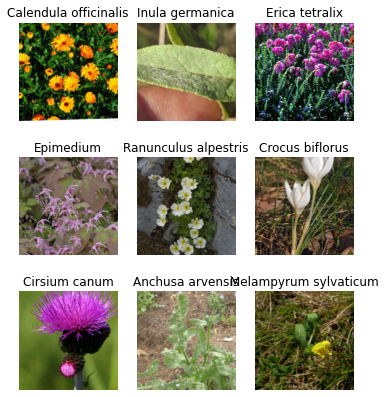

In [47]:
data.show_batch(max_n=9, figsize=(6,7))

In [48]:
data.vocab.o2i

{'Anacamptis palustris': 0,
 'Anchusa arvensis': 1,
 'Arabis procurrens': 2,
 'Aristolochia clematitis': 3,
 'Calendula officinalis': 4,
 'Cirsium canum': 5,
 'Crocus biflorus': 6,
 'Epimedium': 7,
 'Erica tetralix': 8,
 'Erodium cicutarium': 9,
 'Geranium phaeum': 10,
 'Gymnadenia conopsea': 11,
 'Inula germanica': 12,
 'Jacobaea vulgaris': 13,
 'Malva moschata': 14,
 'Melampyrum sylvaticum': 15,
 'Narcissus poeticus': 16,
 'Pulsatilla alpina alba': 17,
 'Ranunculus alpestris': 18,
 'Salvia glutinosa': 19}

### We will start with a resnet34 architecture and train for 8 epochs

In [49]:
learn = cnn_learner(data, resnet34, pretrained=True, metrics=error_rate).to_fp16()

In [50]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.174835,1.452201,0.418454,00:56
1,1.488675,0.739231,0.217674,00:56
2,0.903383,0.601565,0.178038,00:56
3,0.689003,0.563918,0.166342,00:55
4,0.549535,0.535185,0.153346,00:54
5,0.440145,0.514823,0.144250,00:55
6,0.399785,0.512161,0.143600,00:55
7,0.389690,0.502763,0.142950,00:55


In [57]:
learn.save('stage_1')

In [58]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

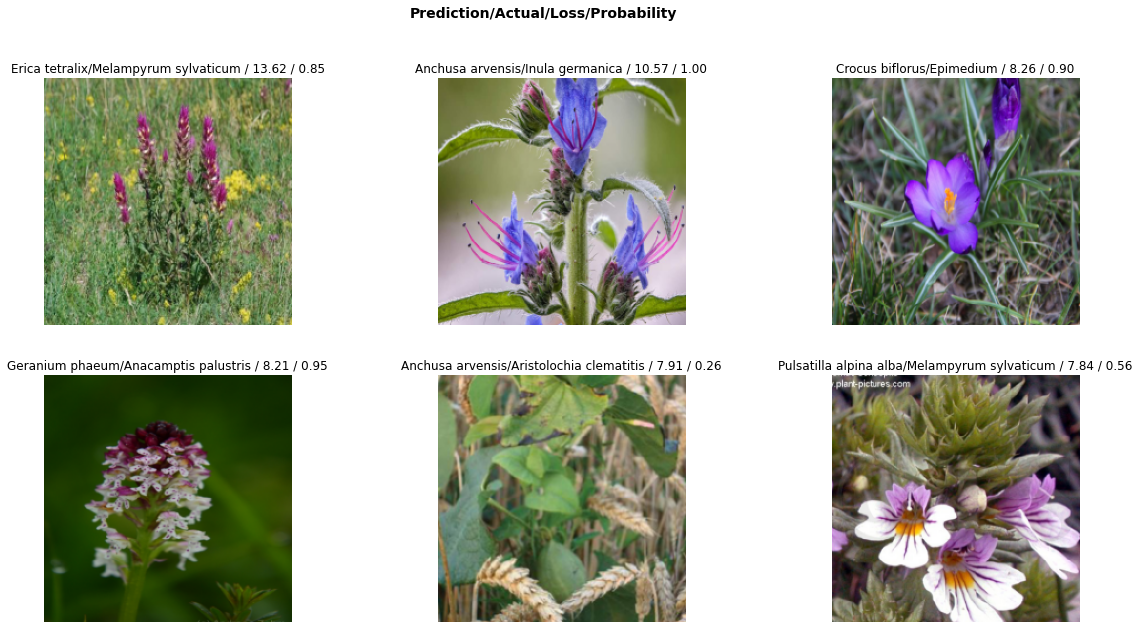

In [59]:
interp.plot_top_losses(6, figsize=(20,10))

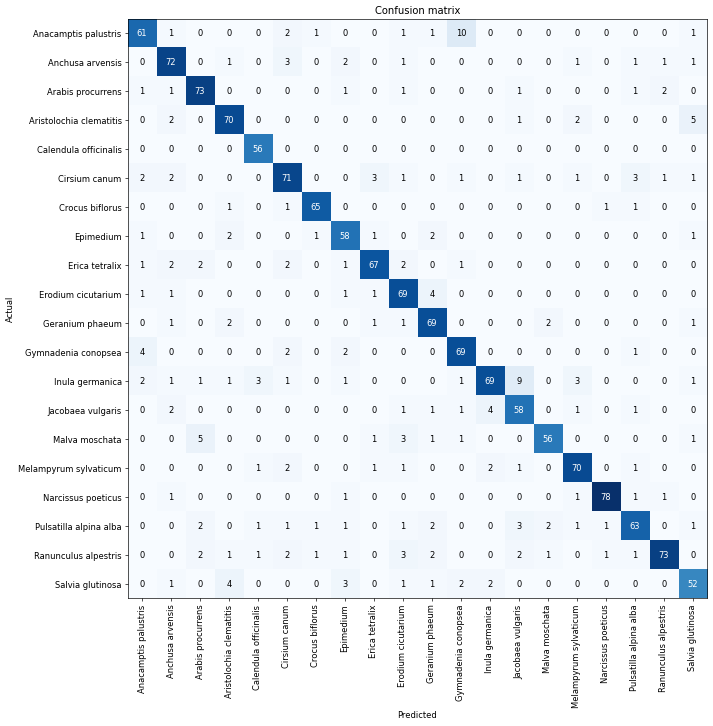

In [60]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

#### Train for 4 additional epochs

In [61]:
learn.load('stage_1');

In [62]:
learn.unfreeze()

In [63]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.068455,2.256342,0.525016,01:14
1,0.915800,1.110891,0.296296,01:14
2,0.608256,0.602646,0.176088,01:14
3,0.348571,0.426280,0.120858,01:14


#### Optimize Learning process by choosing the right learning rate

In [64]:
learn.load('stage_1');

(2.5118865210060903e-08, 3.6307804407442745e-07)

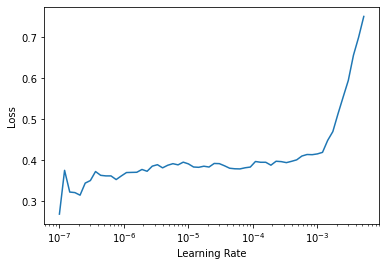

In [65]:
learn.lr_find()

In [66]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.358075,0.496821,0.137752,01:14
1,0.357694,0.477749,0.136452,01:15
2,0.306314,0.462870,0.135153,01:14
3,0.269404,0.463224,0.131254,01:14


We have an error rate of 13.1 let's see if we can improve this.

#### Now we use fastai's fine_tune method

In [67]:
learn = cnn_learner(data, resnet34, metrics=error_rate).to_fp16()
learn.fine_tune(15, freeze_epochs=6)

epoch,train_loss,valid_loss,error_rate,time
0,3.467657,1.909825,0.565302,00:56
1,1.994488,1.007056,0.296946,00:56
2,1.291504,0.802384,0.246914,00:55
3,0.957388,0.695692,0.202729,00:55
4,0.802134,0.650134,0.201430,00:56
5,0.691903,0.605784,0.189734,00:56


epoch,train_loss,valid_loss,error_rate,time
0,0.480399,0.508228,0.153346,01:13
1,0.374530,0.486174,0.142950,01:15
2,0.322209,0.508008,0.150747,01:15
3,0.257875,0.572966,0.153996,01:14
4,0.226545,0.509582,0.137752,01:14
5,0.163395,0.510113,0.131254,01:14
6,0.139696,0.560077,0.129305,01:14
7,0.095581,0.532459,0.122157,01:13
8,0.068752,0.520890,0.114360,01:14
9,0.043296,0.499975,0.109812,01:13


Ok we got an error rate of 9.5%. Let's see if we can improve this by using a resnet50 architecture.

### Resnet50

In [68]:
learn = cnn_learner(data, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(20, freeze_epochs=10)

epoch,train_loss,valid_loss,error_rate,time
0,2.358886,1.134739,0.335932,01:37
1,1.401305,0.811530,0.235218,01:37
2,0.999212,0.731316,0.220273,01:37
3,0.788937,0.689037,0.205978,01:38
4,0.684342,0.654967,0.192982,01:37
5,0.600072,0.625162,0.179987,01:36
6,0.531812,0.554150,0.155296,01:36
7,0.479455,0.566013,0.165042,01:37
8,0.438778,0.585529,0.172840,01:37
9,0.376240,0.555374,0.154646,01:37


epoch,train_loss,valid_loss,error_rate,time
0,0.243737,0.470668,0.134503,02:06
1,0.178427,0.452282,0.126706,02:06
2,0.151661,0.492716,0.136452,02:06
3,0.159907,0.549585,0.131254,02:07
4,0.188101,0.504051,0.131254,02:06
5,0.167249,0.506466,0.126706,02:07
6,0.149987,0.639056,0.142300,02:06
7,0.110971,0.480828,0.118908,02:07
8,0.096812,0.459045,0.113060,02:07
9,0.075266,0.534504,0.125406,02:06


For now we achieved an error rate of 8.6%. In the next step we take the best model from above and train it again on a manually cleaned data set.

In [7]:
file_count_cleaned = [len(files) for r, d, files in os.walk('/storage/plant_data_cleaned')]

In [8]:
file_count_cleaned[1:]

[355,
 373,
 366,
 334,
 347,
 364,
 362,
 352,
 372,
 345,
 360,
 373,
 325,
 359,
 348,
 365,
 352,
 326]

In [9]:
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
bs=64

In [10]:
path = Path('/storage/plant_data_cleaned')
data_cleaned = ImageDataLoaders.from_folder(path, valid_pct=0.2, batch_tfms=batch_tfms, 
                                   item_tfms=item_tfms, bs=bs)

In [11]:
verify_images(data_cleaned.valid_ds.items)

(#0) []

In [12]:
verify_images(data_cleaned.valid_ds.items)

(#0) []

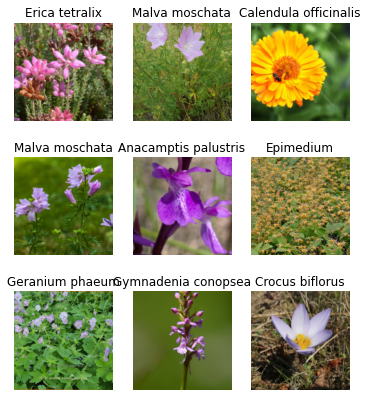

In [13]:
data_cleaned.show_batch(max_n=9, figsize=(6,7))

In [14]:
learn = cnn_learner(data_cleaned, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(20, freeze_epochs=10)

epoch,train_loss,valid_loss,error_rate,time
0,2.331225,0.921307,0.263199,01:29
1,1.220712,0.635304,0.178881,01:20
2,0.815754,0.556500,0.154452,01:18
3,0.604275,0.525044,0.143420,01:19
4,0.495372,0.522122,0.136328,01:19
5,0.432536,0.506429,0.127660,01:25
6,0.367529,0.533437,0.129236,01:25
7,0.308445,0.441767,0.118991,01:26
8,0.278074,0.463139,0.115051,01:26
9,0.249653,0.434926,0.117415,01:25


epoch,train_loss,valid_loss,error_rate,time
0,0.162231,0.365560,0.095351,01:53
1,0.122495,0.368912,0.091411,01:50
2,0.099578,0.354811,0.085894,01:50
3,0.108582,0.395355,0.100867,01:51
4,0.137753,0.421032,0.106383,01:50
5,0.122911,0.447525,0.093775,01:50
6,0.097988,0.503194,0.099291,01:50
7,0.077249,0.393252,0.082742,01:51
8,0.064592,0.389656,0.080378,01:50
9,0.052088,0.499335,0.096139,01:51
